# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from statsmodels.formula.api import ols

# Functions.

In [3]:
def load_data(filename):
    # Using pd.read_csv to read CSV file into a DataFrame
    df = pd.read_csv(filename)
    return df

# Data importing and inspection. 

In [4]:
Shooting = load_data('school-shootings-data.csv')   # Importing csv file as dataset. 
Shooting.head() # Printing the first five rows. 

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,80480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.6,9,12,41,Jefferson County,8,8059,21.0
1,2,2.20054E+11,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.0,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,1.30441E+11,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.0,9,12,125,Rockdale County,13,13247,21.0
3,4,4.21899E+11,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.0,9,12,2007,Philadelphia County,42,42101,11.0
4,5,2.50279E+11,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,NaN,9,12,543,Suffolk County,25,25025,11.0


FIGURE 1. Shooting dataset. This represents the display of a total of five rows and fifty columns as part of the data importing and inspection. 

In [5]:
# Command to display the type of data per variable set in columns . Output is not shown. 
#Shooting.dtypes

In [6]:
# Command to display the dataset information from the Non-null columns and datatype. Output is not shown.
#Shooting.info()

In [7]:
# Creating a Null Shooting new DataFrame wrapping the total sum "null" values per column. 
Null_Shooting= pd.DataFrame(Shooting.isnull().sum())
Null_Shooting.rename(columns={0:'Null_values'}, inplace= True)

# Columns that needs to be imputed. 
Null_Shooting[Null_Shooting['Null_values']>0]

,Null_values
nces_school_id,6
nces_district_id,24
district_name,25
time,24
age_shooter1,113
gender_shooter1,78
race_ethnicity_shooter1,239
shooter_relationship1,121
shooter_deceased1,125
deceased_notes1,349


FIGURE 2. Null_values dataset. This represent the total summary of variables present in the original dataset that needs to be imputed. By imputing, we understand empty cells or values in a row. 

In [8]:
# Number of rows in the dataset. 
print(f' Number of rows in the dataset: {Shooting.shape[0]}' )

# Number of Columns in the dataset. 
print( f' Number of columns in the dataset: {Shooting.shape[1]}')

 Number of rows in the dataset: 387
 Number of columns in the dataset: 50


## Imputing Data. 

In [9]:
# Columns to impute for categorical variables.
cols_categorical_to_impute= ['district_name','gender_shooter1', 'race_ethnicity_shooter1', 'shooter_relationship1' , 'weapon',  'weapon_source']

# Creating a for loop to iterate through this list and impute missing values. 
for column_categorical in cols_categorical_to_impute:
    Shooting[column_categorical].fillna('Unknown', inplace=True)

In [10]:
# Columns to impute for "numerical" variables. 
cols_to_impute= ['age_shooter1', 'shooter_deceased1' , 'white', 'black', 'hispanic', 'asian', 'american_indian_alaska_native', 'hawaiian_native_pacific_islander', 
                 'two_or_more', 'lat' , 'long', 'staffing', 'lunch']

numeric_cols_to_impute = [col for col in cols_to_impute if pd.api.types.is_numeric_dtype(Shooting[col])]

# Impute missing values with the mean for numeric columns
for col in numeric_cols_to_impute:
    Shooting[col].fillna(Shooting[col].mean(), inplace=True)


In [11]:
# Dataframe : Shooting after being imputed. 

# Creating a Null Shooting new DataFrame wrapping the total sum "null" values per column. 
Null_Shooting= pd.DataFrame(Shooting.isnull().sum())
Null_Shooting.rename(columns={0:'Null_values'}, inplace= True)

# Columns that needs to be imputed. 
Null_Shooting[Null_Shooting['Null_values']>0]

,Null_values
nces_school_id,6
nces_district_id,24
time,24
deceased_notes1,349
age_shooter2,375
gender_shooter2,375
race_ethnicity_shooter2,380
shooter_relationship2,381
shooter_deceased2,381
deceased_notes2,386


FIGURE 3. Null_values dataset after being imputed. 

# Descriptive Statistics. 

As part of our data analysis, we will conduct a basic examination of the number of fatalities, injuries, and overall casualties from 1999 to 2023. This analysis aims to provide us with the mean, standard deviation, and the total number of cases within this timeframe.

We will create histogram distributions for each specific case to better visualize the variation across the years. Additionally, we will generate box plots to identify outliers or extreme cases within each situation

### Kiled cases since (1999 - 2023 )

Note: all values are rounded two decimals places.

- Average of number of Killed cases since ( 1999- 2023) : 2.30
- Standard deviation of number of Killed cases since ( 1999- 2023): 4.84
- Number of Killed cases since ( 1999- 2023): 66

In [12]:
Kill_Shooting = Shooting.groupby(['year', 'killed']).size().reset_index(name='Cases'); #print(Kill_Shooting)
Mu_Kill_Shooting=np.mean(Kill_Shooting['killed']); print(f' Average of number of Killed cases since ( 1999- 2023) : {Mu_Kill_Shooting:.2f}')
Std_Kill_Shooting=Kill_Shooting['killed'].std(); print(f'Standard deviation of number of Killed cases since ( 1999- 2023): {Std_Kill_Shooting:.2f}')
Kill_Shooting_cases=Kill_Shooting['killed'].count(); print(f'Number of Killed cases since ( 1999- 2023): {Kill_Shooting_cases}')
#Kill_Shooting.describe() # Only for checking purposes, you are welcomed to uncoment the command.

 Average of number of Killed cases since ( 1999- 2023) : 2.30
Standard deviation of number of Killed cases since ( 1999- 2023): 4.84
Number of Killed cases since ( 1999- 2023): 66


- Histogram of Killed cases since (1999-2023)



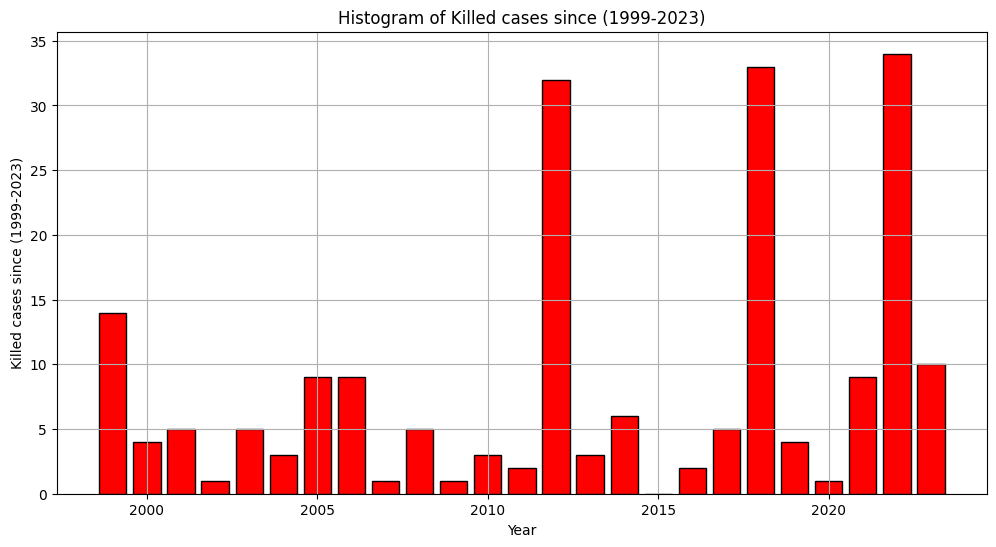

In [13]:
# Aggregating the data by year and summing the killed cases for each year
yearly_killed = Shooting.groupby('year')['killed'].sum()

# Creating the histogram
plt.figure(figsize=(12, 6))
plt.bar(yearly_killed.index, yearly_killed, color='red', edgecolor='k')
plt.ylabel('Killed cases since (1999-2023)')
plt.xlabel('Year')
plt.title('Histogram of Killed cases since (1999-2023)')
plt.grid(True)
plt.show()


FIGURE 4. Histogram of Killed cases since (1999-2023). The (x) axis represents the summary of fatality cases throughout the time stamp. The (y) axis, represents the counts of killed cases. 

- Side by side boxplot of Killed cases since (1999-2023).

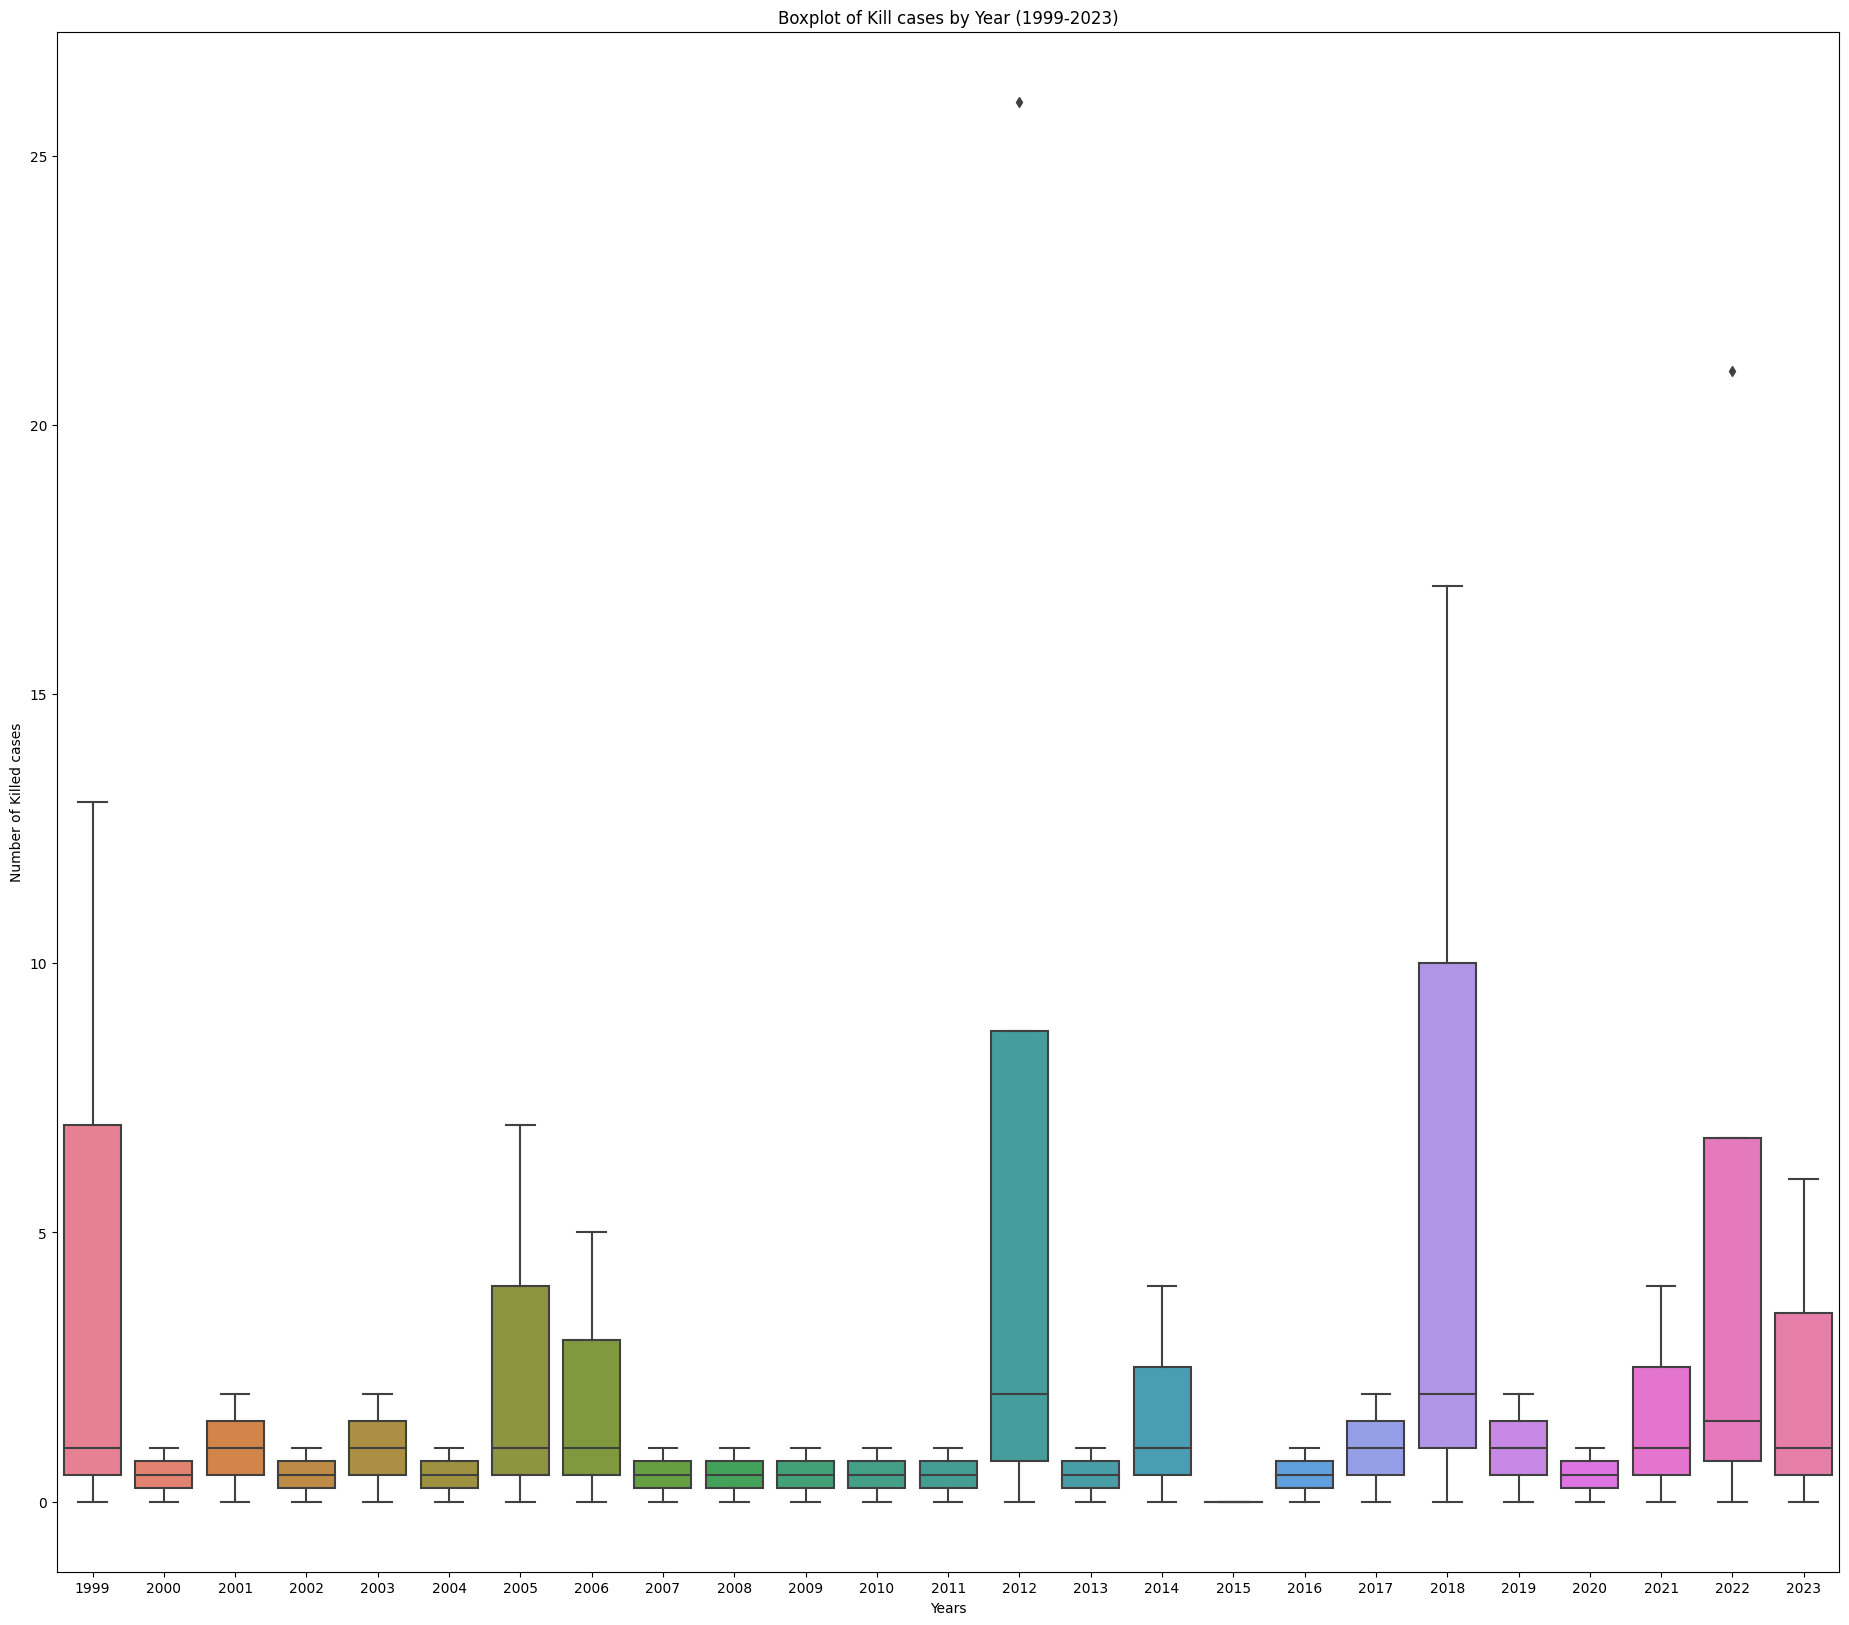

In [14]:
plt.figure(figsize=(23, 20))
sns.boxplot(data=Kill_Shooting, x='year', y='killed', palette='husl')
plt.title('Boxplot of Kill cases by Year (1999-2023)')
plt.xlabel('Years')
plt.ylabel('Number of Killed cases')
plt.show()

FIGURE 5. Boxt-plot of Killed cases since (1999-2023). The (x) axis represents the count of fatality cases throughout the time stamp. The (y) axis, represents the counts of killed cases. 

### Injured cases since (1999 - 2023 )

Note: all values are rounded two decimals places.

- Average of number of Injured cases since ( 1999- 2023) : 2.75
- Standard Deviation  of number of Injured cases since ( 1999- 2023): 3.81
- Number of Injured cases since ( 1999- 2023): 97


In [15]:
Injured_Shooting = Shooting.groupby(['year', 'injured']).size().reset_index(name='Cases')
Mu_Injured_Shooting=np.mean(Injured_Shooting['injured']); print(f' Average of number of Injured cases since ( 1999- 2023) : {Mu_Injured_Shooting:.2f}')
Std_Injured_Shooting=np.std(Injured_Shooting['injured']); print(f'Standard Deviation  of number of Injured cases since ( 1999- 2023): {Std_Injured_Shooting:.2f}')
Injured_SHooting_cases=Injured_Shooting['injured'].count(); print(f'Number of Injured cases since ( 1999- 2023): {Injured_SHooting_cases}')
#Injured_Shooting.describe() # Only for checking purposes, you are welcomed to uncoment the command.

 Average of number of Injured cases since ( 1999- 2023) : 2.75
Standard Deviation  of number of Injured cases since ( 1999- 2023): 3.81
Number of Injured cases since ( 1999- 2023): 97


- Histogram of Injured cases since (1999-2023)


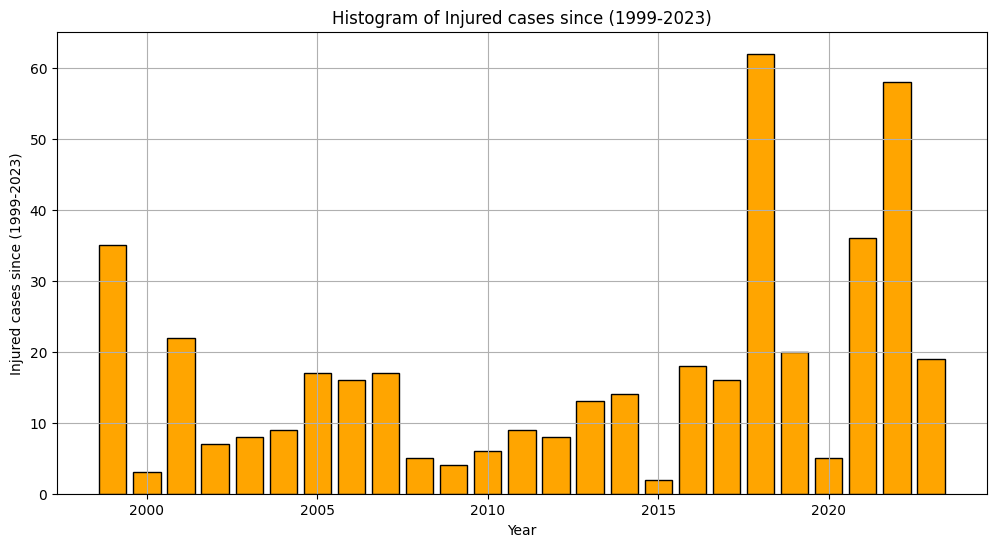

In [16]:
# Aggregating the data by year and summing the Injured cases for each year
yearly_injured = Shooting.groupby('year')['injured'].sum()

# Creating the histogram
plt.figure(figsize=(12, 6))
plt.bar(yearly_injured.index, yearly_injured, color='orange', edgecolor='k')
plt.ylabel('Injured cases since (1999-2023)')
plt.xlabel('Year')
plt.title('Histogram of Injured cases since (1999-2023)')
plt.grid(True)
plt.show()

FIGURE 6. Histogram of Injured cases since (1999-2023). The (x) axis represents the summary of Injured cases throughout the time stamp. The (y) axis, represents the counts of injured cases. 

- Side by side boxplot of Injured cases since (1999-2023).

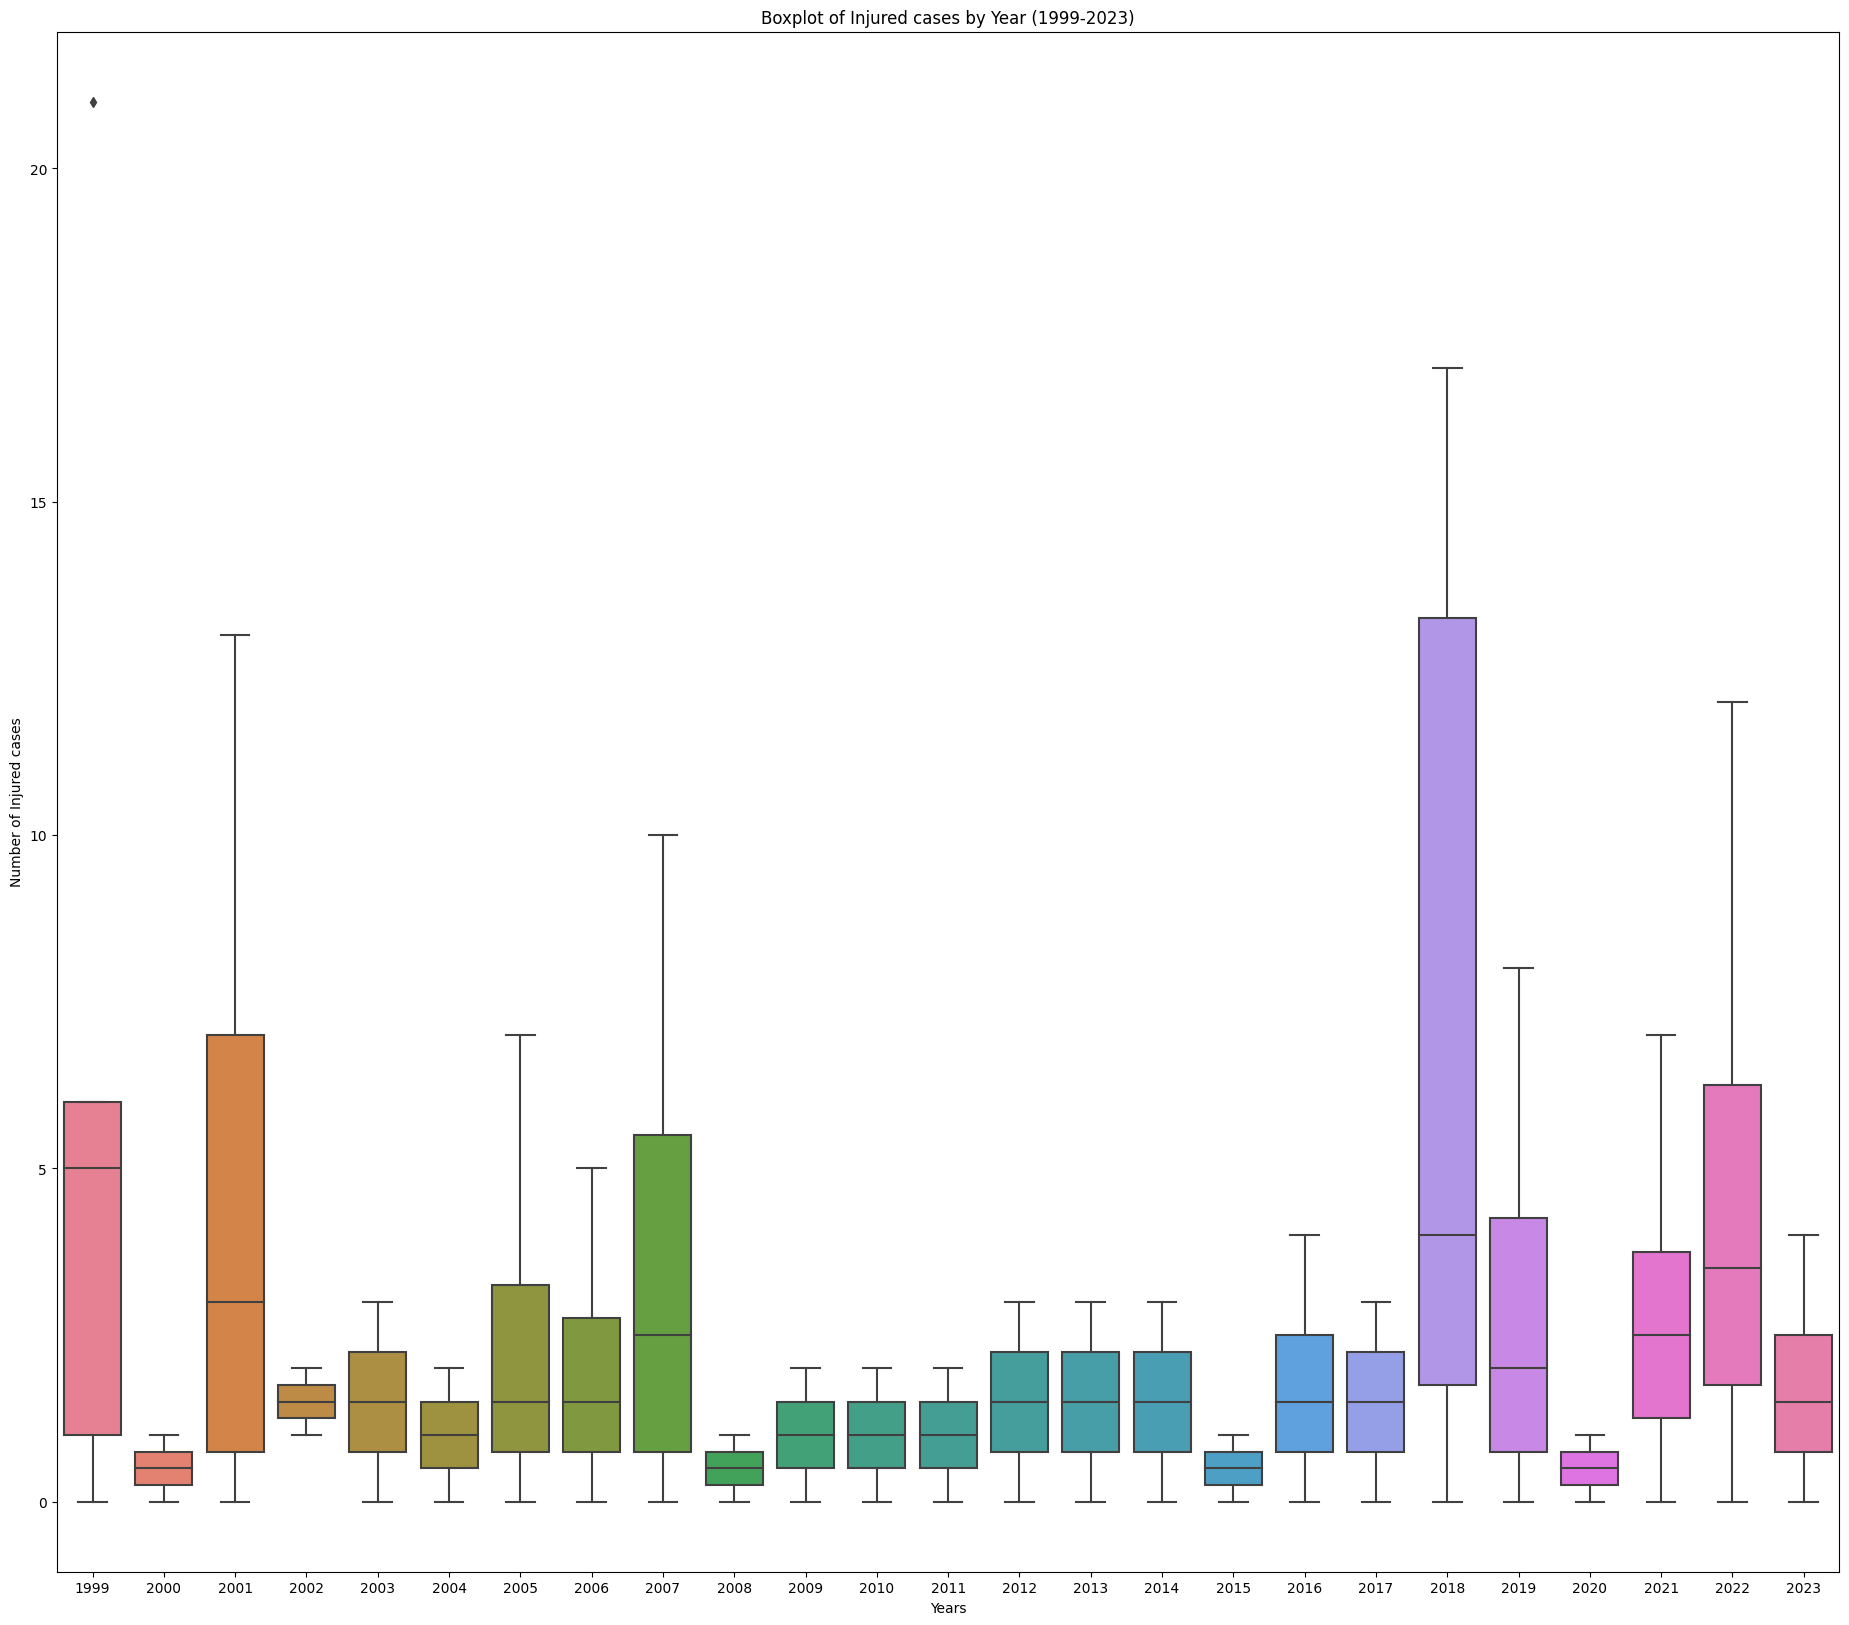

In [17]:
plt.figure(figsize=(23, 20))
sns.boxplot(data=Injured_Shooting, x='year', y='injured', palette='husl')
plt.title('Boxplot of Injured cases by Year (1999-2023)')
plt.xlabel('Years')
plt.ylabel('Number of Injured cases')
plt.show()

FIGURE 7. Box-plot of injured cases since (1999-2023). The (x) axis represents the summary of injured cases throughout the time stamp. The (y) axis, represents the counts of injured cases. 

### Casualties cases since (1999 - 2023 )

Note: all values are rounded two decimals places.

- Average of number of Casualty cases since ( 1999- 2023) : 4.07
- Standard Deviation  of number of Casualty cases since ( 1999- 2023): 6.91
- Number of Casualty cases since ( 1999- 2023): 100

In [18]:
Casualties_Shooting = Shooting.groupby(['year', 'casualties']).size().reset_index(name='Cases')
Mu_Casualties_Shooting=np.mean(Casualties_Shooting['casualties']); print(f' Average of number of Casualty cases since ( 1999- 2023) : {Mu_Casualties_Shooting:.2f}')
Std_Casualties_Shooting=np.std(Casualties_Shooting['casualties']); print(f'Standard Deviation  of number of Casualty cases since ( 1999- 2023): {Std_Casualties_Shooting:.2f}')
Casualties_Shooting_cases=Casualties_Shooting['casualties'].count(); print(f'Number of Casualty cases since ( 1999- 2023): {Casualties_Shooting_cases}')
#Casualties_Shooting.describe() # Only for checking purposes, you are welcomed to uncoment the command.

 Average of number of Casualty cases since ( 1999- 2023) : 4.07
Standard Deviation  of number of Casualty cases since ( 1999- 2023): 6.91
Number of Casualty cases since ( 1999- 2023): 100


- Histogram of Casualty cases since (1999-2023)


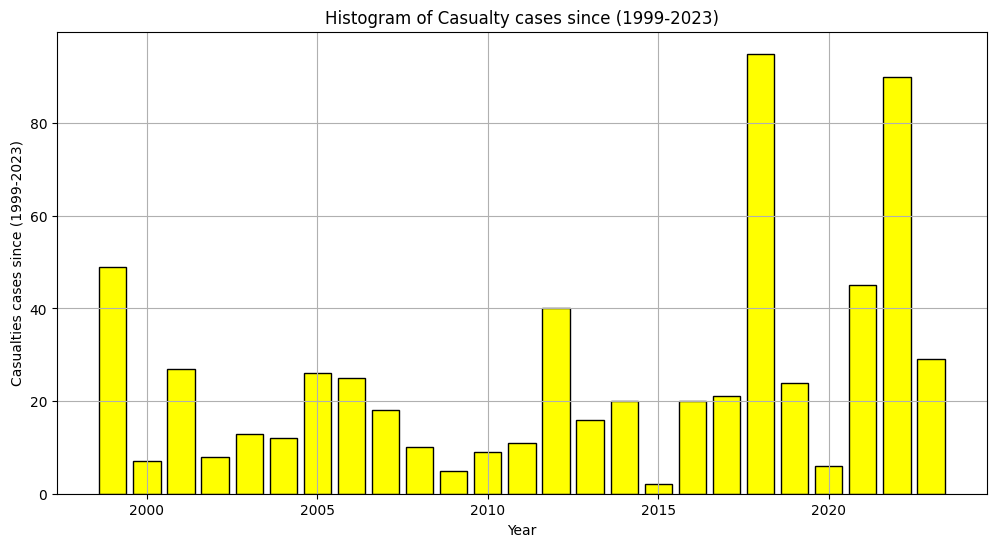

In [19]:
# Aggregating the data by year and summing the Casualy cases for each year
yearly_casualties = Shooting.groupby('year')['casualties'].sum()

# Creating the histogram
plt.figure(figsize=(12, 6))
plt.bar(yearly_casualties.index, yearly_casualties, color='yellow', edgecolor='k')
plt.ylabel('Casualties cases since (1999-2023)')
plt.xlabel('Year')
plt.title('Histogram of Casualty cases since (1999-2023)')
plt.grid(True)
plt.show()

FIGURE 8. Histogram of casualties' cases since (1999-2023). The (x) axis represents the summary of casualties' cases throughout the time stamp. The (y) axis, represents the counts of casualties' cases. 

- Side by side boxplot of Casualties cases since (1999-2023).

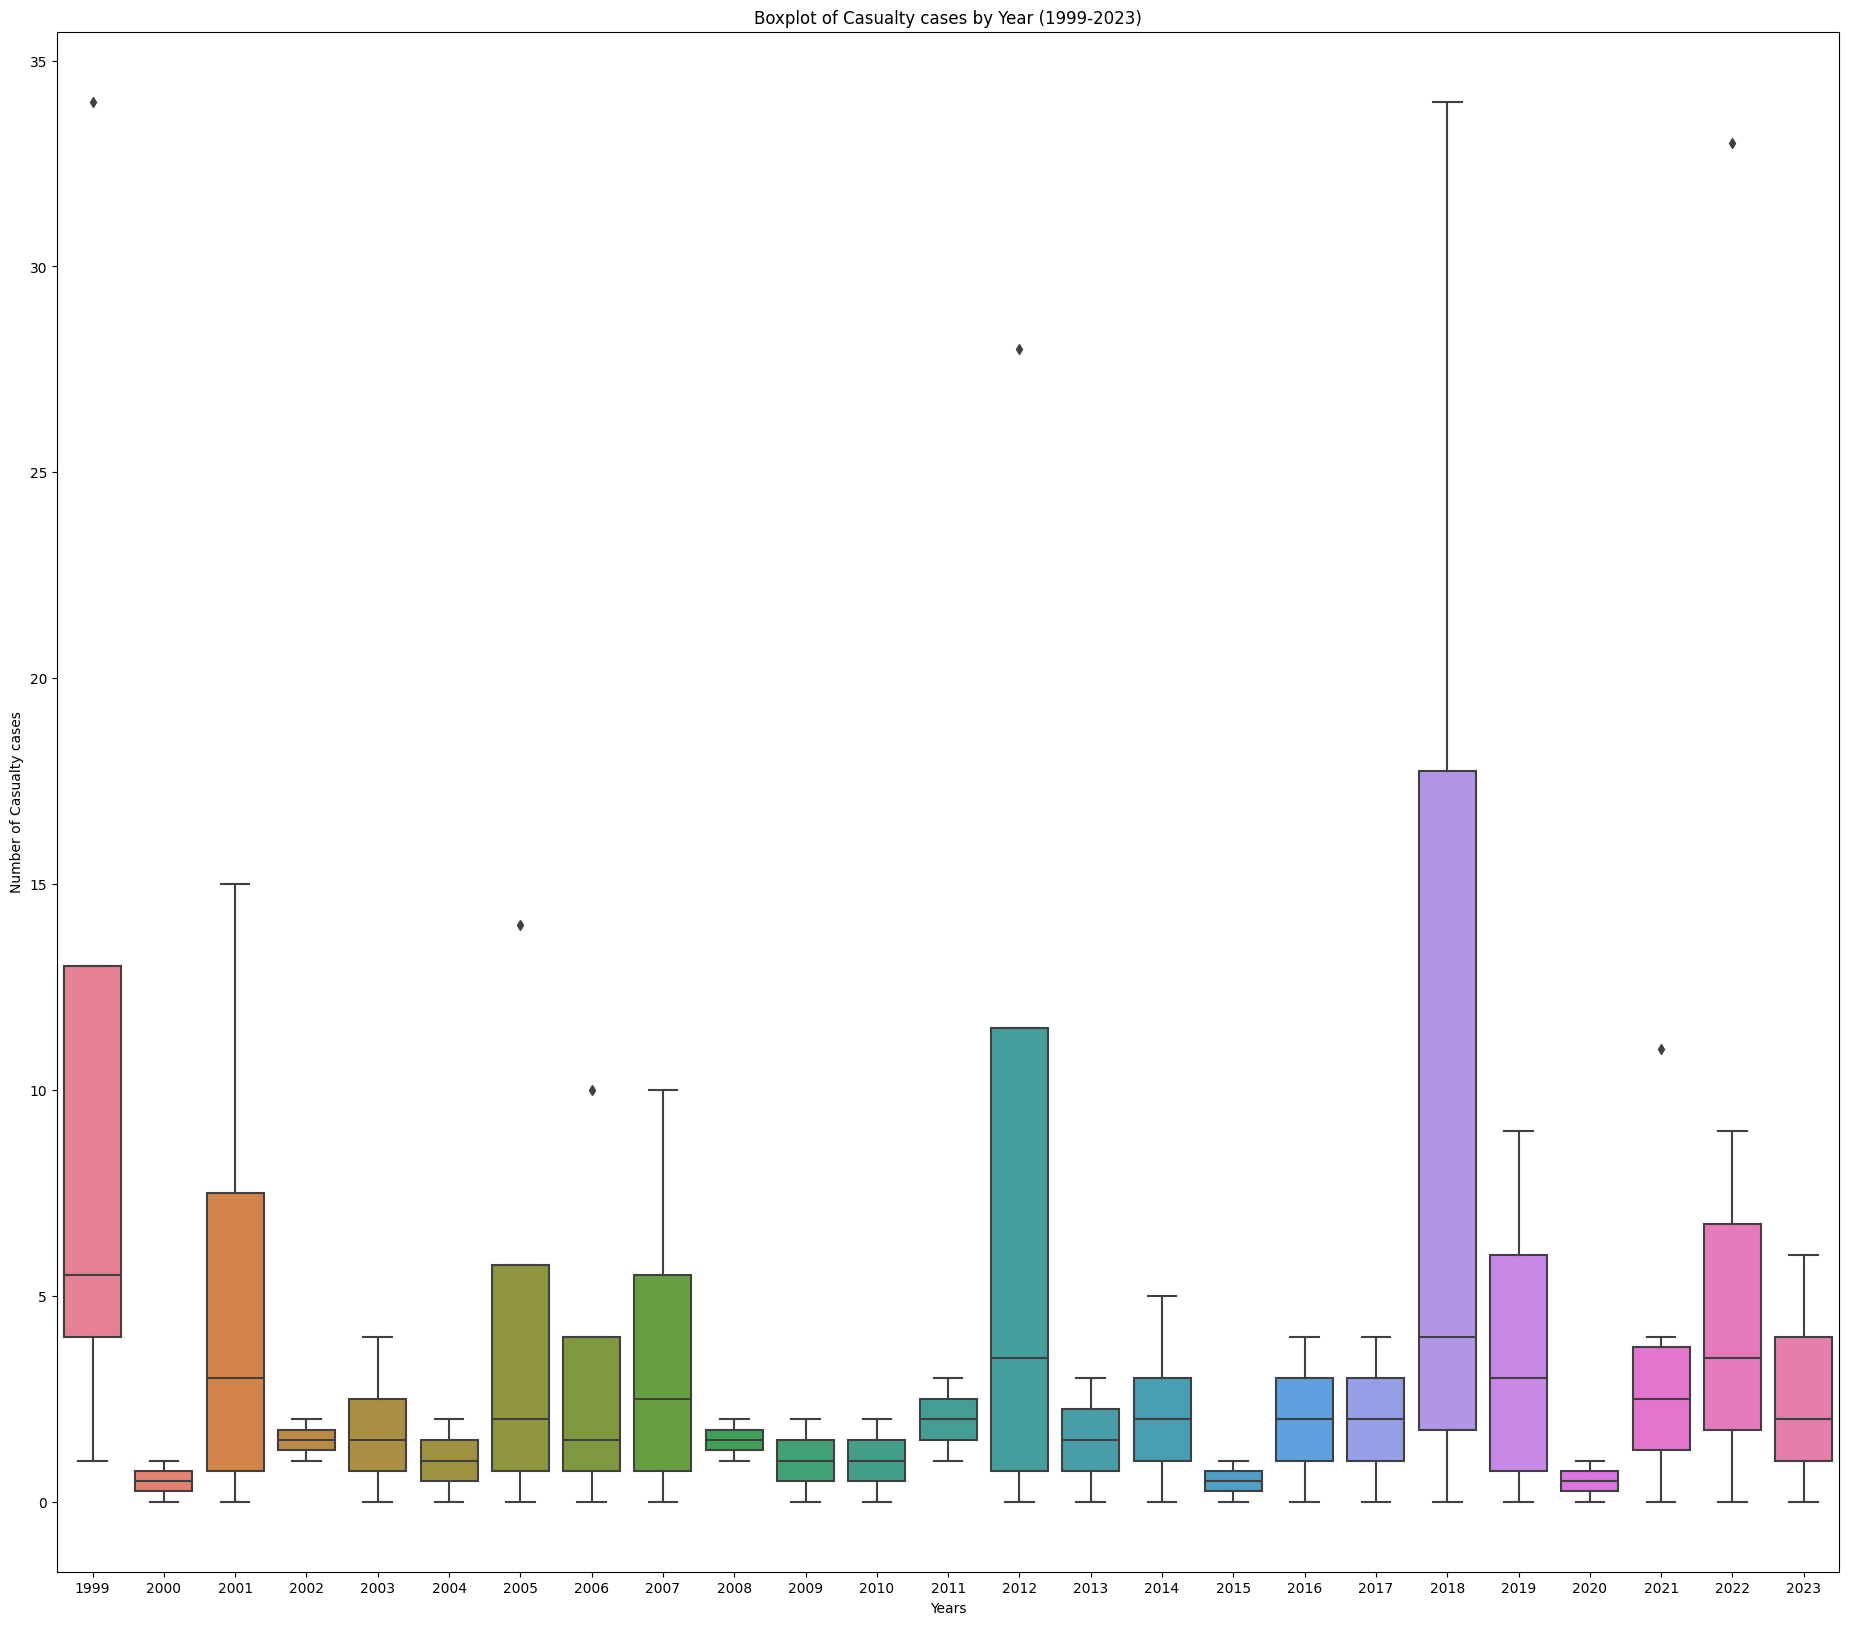

In [20]:
plt.figure(figsize=(23, 20))
sns.boxplot(data=Casualties_Shooting, x='year', y='casualties', palette='husl')
plt.title('Boxplot of Casualty cases by Year (1999-2023)')
plt.xlabel('Years')
plt.ylabel('Number of Casualty cases')
plt.show()

FIGURE 9. Box-plot of casualties' cases since (1999-2023). The (x) axis represents the summary of casualties' cases throughout the time stamp. The (y) axis, represents the counts of casualties' cases. 

- Summary of the Analysis of killed, injured and casualties events (1999-2023):

- - Killed Cases (Fatalities):

    - Average Number of Killed Cases: 2.30
    - Standard Deviation of Killed Cases: 4.84
    - Total Number of Killed Cases: 66

- - Injured Cases:

    - Average Number of Injured Cases: 2.75
    - Standard Deviation of Injured Cases: 3.81
    - Total Number of Injured Cases: 97

- - Casualty Cases:

    - Average Number of Casualty Cases: 4.07
    - Standard Deviation of Casualty Cases: 6.91
    - Total Number of Casualty Cases: 100

Analysis Details:

The data collected include incidents that occurred on school campuses before, during, or shortly after class hours. The following types of incidents were excluded from the analysis:

- Shootings at after-hours events
- Accidental discharges with no injuries beyond the person handling the firearm. 
- Suicides that were private or didn't pose a threat to other students.
- Firearm incidents at colleges and universities, which primarily affect young adults rather than children.
- This analysis provides insights into the trends and patterns of incidents involving children at schools over the specified period.

### Bloxplot of Killed, injured, and casualties summarized by day of the week. 

- Boxplot of Killed cases by day of the week. 

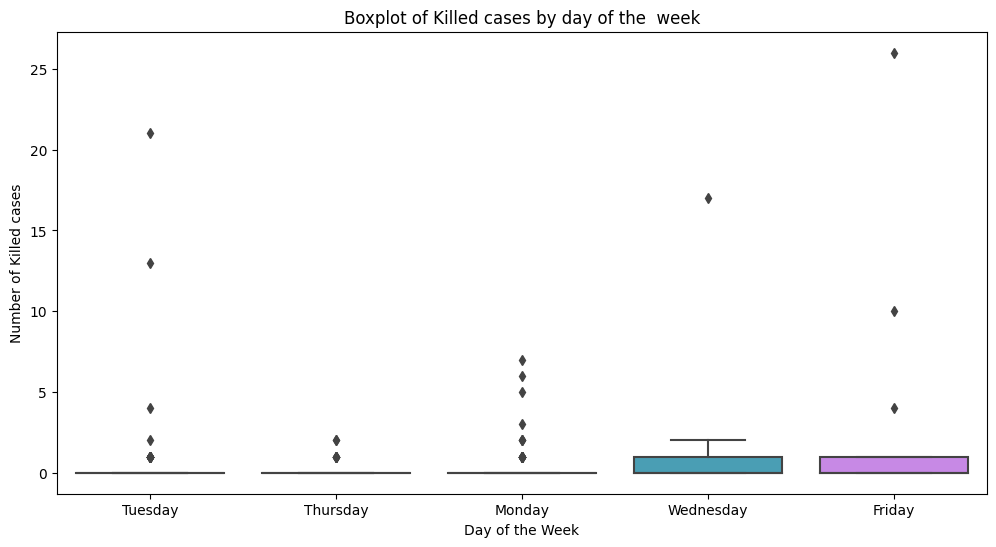

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=Shooting, x='day_of_week', y='killed', palette='husl')
plt.title('Boxplot of Killed cases by day of the  week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Killed cases')
plt.show()

FIGURE 10. Box-plot of Killed cases since (1999-2023). The (x) axis represents the summary of fatality cases regarding the seven days of the week. The (y) axis, represents the counts of killed cases. 

- Boxplot of Injured cases by day of the week. 

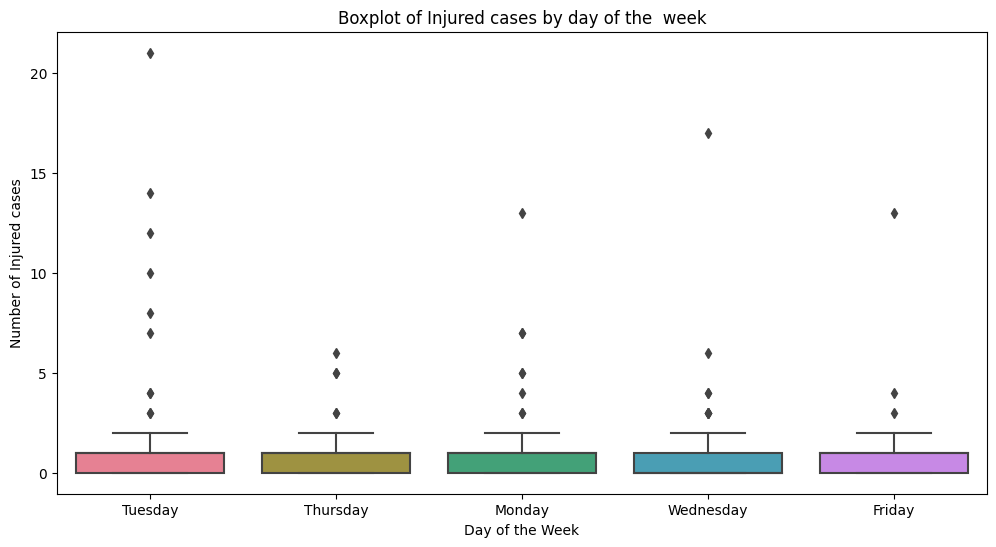

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=Shooting, x='day_of_week', y='injured', palette='husl')
plt.title('Boxplot of Injured cases by day of the  week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Injured cases')
plt.show()

FIGURE 11. Box-plot of Injured cases since (1999-2023). The (x) axis represents the summary of injured cases regarding the seven days of the week. The (y) axis, represents the counts of injured cases. 

- Boxplot of Casualtiy cases by day of the week. 

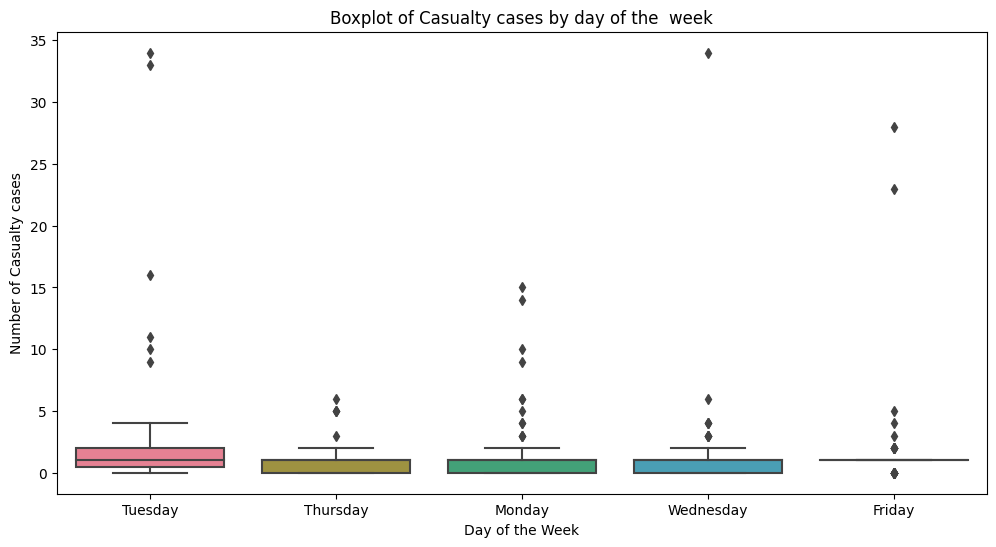

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=Shooting, x='day_of_week', y='casualties', palette='husl')
plt.title('Boxplot of Casualty cases by day of the  week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Casualty cases')
plt.show()

FIGURE 12. Box-plot of casualties' cases since (1999-2023). The (x) axis represents the summary of casualties' cases regarding the seven days of the week. The (y) axis, represents the counts of casualties' cases. 

Analysis of Killed, Injured, and Casualties by Day of the Week:

- From the previous boxplots, it appears that there is no clear and consistent preference for selecting a specific day of the week in the events we have analyzed. However, in the next phase of this project, we will conduct a linear correlation analysis to determine whether any patterns or correlations exist between our target variables (killed, injured, and casualties) and independent categorical variables, such as the day of the week.

### Visualization of Shooter (1) Casualties collected by gender identification.

- Note: nonbinary population was not taken into account for this particular case since the number of occurances are not significant to generate enough data. 


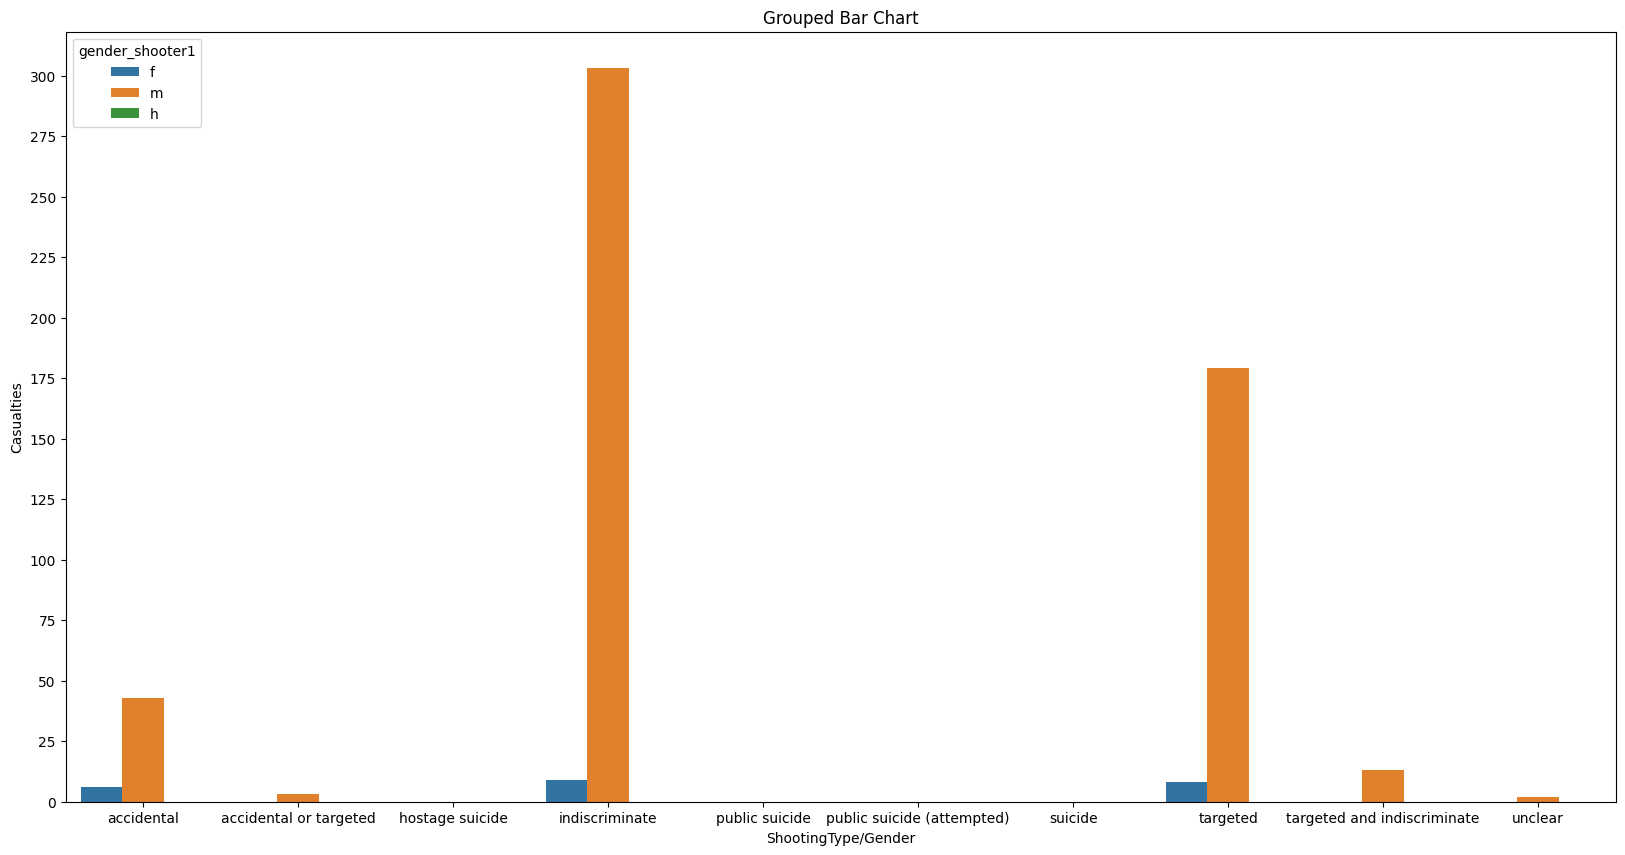

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
loc = os.getcwd()
data = pd.read_csv(loc+'/school-shootings-data.csv')
groupedData=data.groupby(['shooting_type','gender_shooter1'])['casualties'].sum().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x='shooting_type', y='casualties', hue='gender_shooter1', data=groupedData)
plt.xlabel('ShootingType/Gender')
plt.ylabel('Casualties')
plt.yticks(range(0, max(groupedData['casualties']) + 1, 25))
plt.title('Grouped Bar Chart')
plt.show()



FIGURE 13. Bar chart of groups: gender/shooter against shooting type. The (x) axis represents the proportion of categorical values of the categorical variable shooting type. The (y) axis, represents the counts of casualties' cases. The distribution of each bar is represented by different colors emphasizing the gender. 

C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


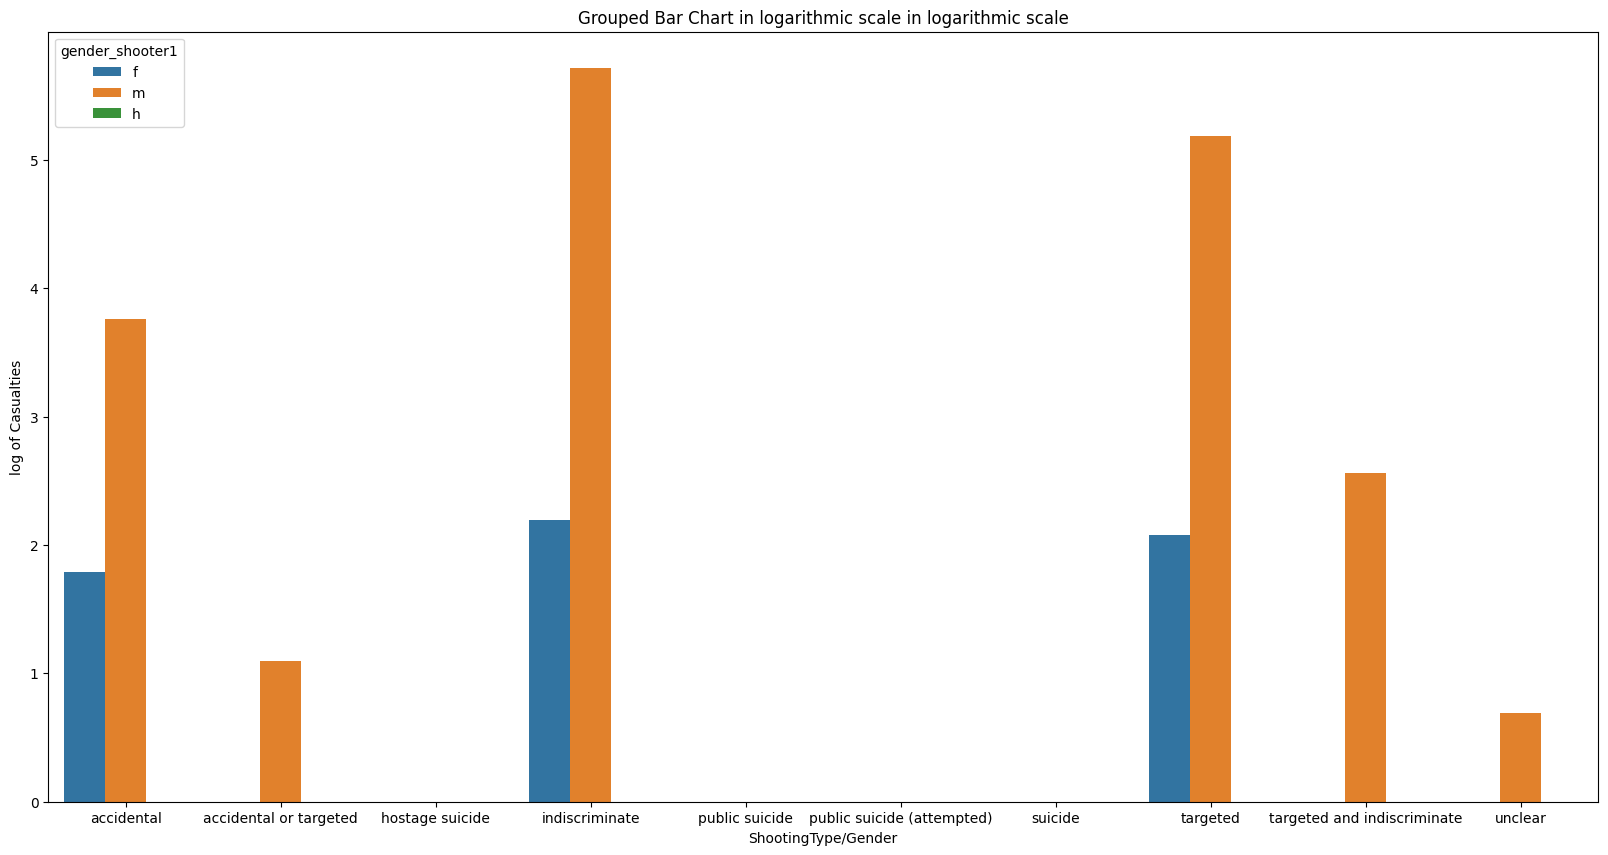

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
loc = os.getcwd()
data = pd.read_csv(loc+'/school-shootings-data.csv')
groupedData=data.groupby(['shooting_type','gender_shooter1'])['casualties'].sum().reset_index()
groupedData['casualties'] = np.log(groupedData['casualties'])
plt.figure(figsize=(20, 10))
sns.barplot(x='shooting_type', y='casualties', hue='gender_shooter1', data=groupedData)
plt.xlabel('ShootingType/Gender')
plt.ylabel('log of Casualties')
#plt.yticks(range(0, max(groupedData['casualties']) + 1, 25))
plt.title('Grouped Bar Chart in logarithmic scale in logarithmic scale')
plt.show()

FIGURE 14. Bar chart of groups in logarithmic scale: gender/shooter against shooting type. The (x) axis represents the proportion of categorical values of the categorical variable shooting type. The (y) axis, represents the counts of casualties' cases. The distribution of each bar is represented by different colors emphasizing the gender.

Summary of Shootings by Gender:

- In our analysis, we created bar graphs to visualize the gender distribution of shooters (1) across various shooting categories. We used labels "m" for male, "f" for female, and "h" for non-binary. We presented two types of bar graphs: one in the normal scale and another with logarithmic transformation for the count numbers. The logarithmic presentation provides a more accurate representation of incident numbers.

- Upon examining the data, we observed that the majority of incidents were associated with male shooters, followed by female shooters. The non-binary population had no recorded incidents, likely due to insufficient data.

- For both male and female shooters, the most commonly represented type of incident was "targeted and indiscriminate." It's important to note that the absence of data for non-binary individuals is a result of limited available data, and no definitive conclusions can be drawn from this group.

### Visualization of Shooter (1) Casualties collected by race ethnicity. 

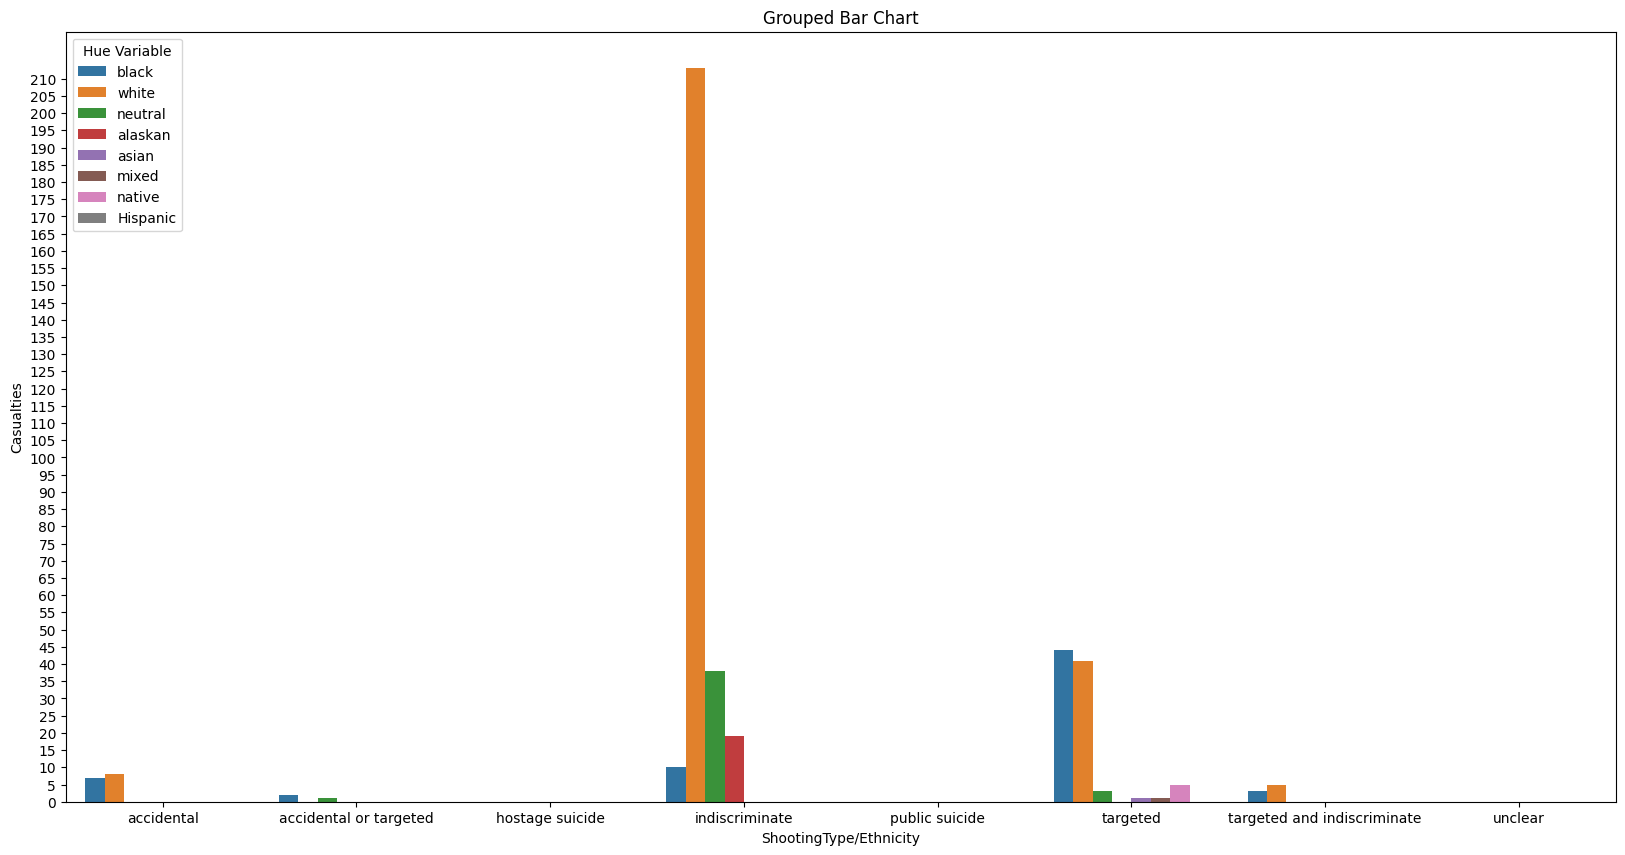

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
loc = os.getcwd()
data = pd.read_csv(loc+'/school-shootings-data.csv')
groupedData=data.groupby(['shooting_type','race_ethnicity_shooter1'])['casualties'].sum().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x='shooting_type', y='casualties', hue='race_ethnicity_shooter1', data=groupedData)
# Manually set legend labels
legend_labels = {'b': 'black', 'w': 'white', 'h': 'neutral','ai':'alaskan','a':'asian','m':'mixed','n':'native','Hispanic':'Hispanic'}
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, [legend_labels[label] for label in groupedData['race_ethnicity_shooter1'].unique()], title='Hue Variable', loc='upper left')

plt.xlabel('ShootingType/Ethnicity')
plt.ylabel('Casualties')
plt.yticks(range(0, max(groupedData['casualties']) + 1, 5))
plt.title('Grouped Bar Chart')
plt.show()

FIGURE 15. Bar chart of groups: race/shooter against shooting type. The (x) axis represents the proportion of categorical values of the categorical variable shooting type. The (y) axis, represents the counts of casualties' cases. The distribution of each bar is represented by different colors emphasizing the race.

C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


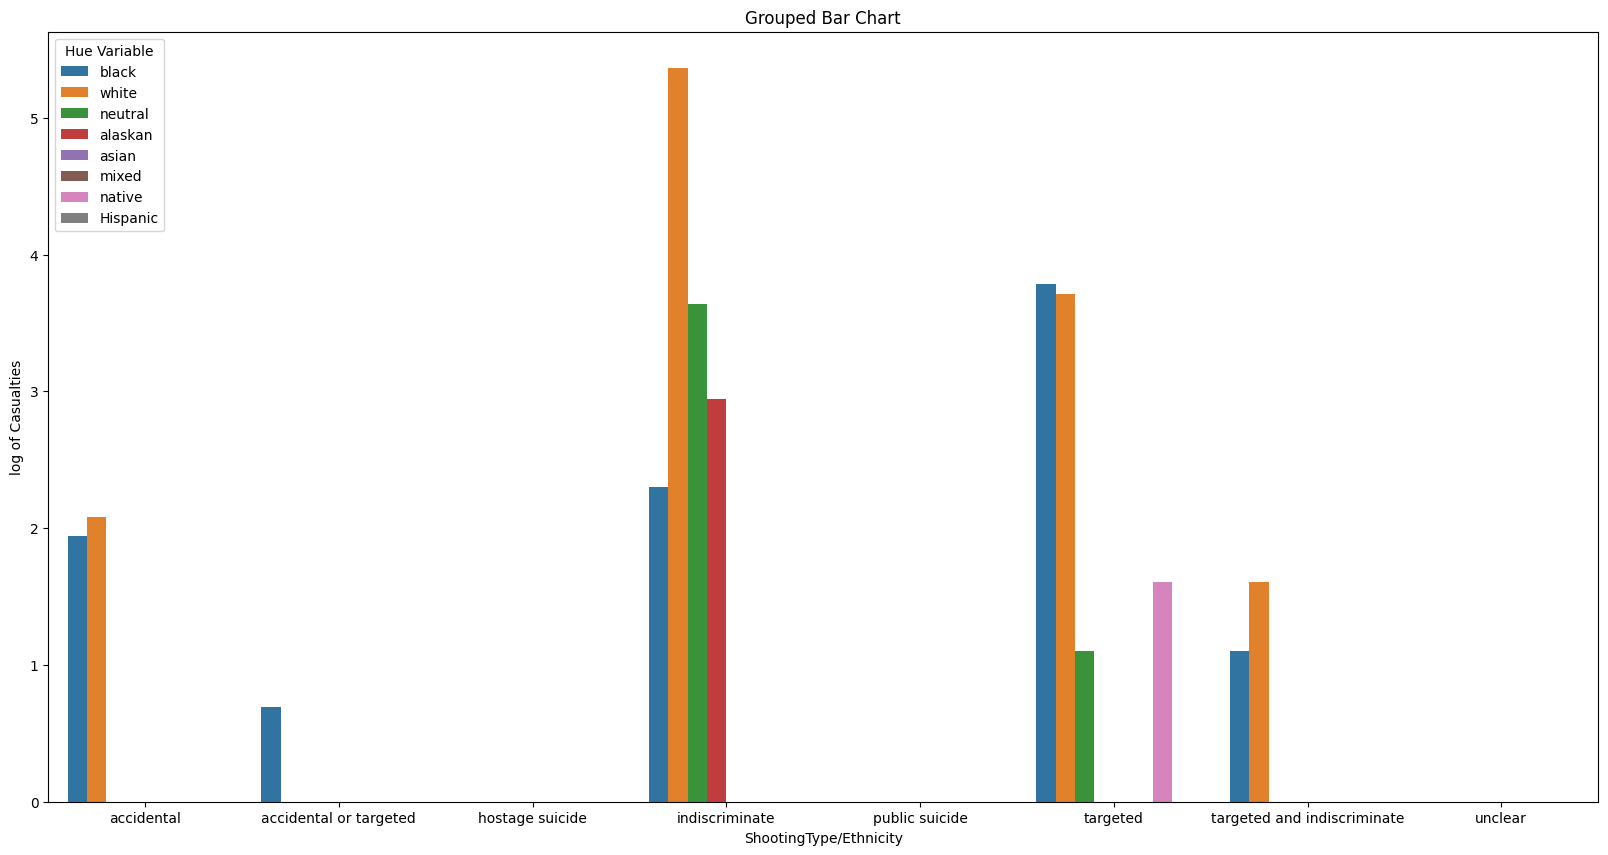

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
loc = os.getcwd()
data = pd.read_csv(loc+'/school-shootings-data.csv')
groupedData=data.groupby(['shooting_type','race_ethnicity_shooter1'])['casualties'].sum().reset_index()
plt.figure(figsize=(20, 10))
groupedData['casualties'] = np.log(groupedData['casualties'])
sns.barplot(x='shooting_type', y='casualties', hue='race_ethnicity_shooter1', data=groupedData)
legend_labels = {'b': 'black', 'w': 'white', 'h': 'neutral','ai':'alaskan','a':'asian','m':'mixed','n':'native','Hispanic':'Hispanic'}
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, [legend_labels[label] for label in groupedData['race_ethnicity_shooter1'].unique()], title='Hue Variable', loc='upper left')

plt.xlabel('ShootingType/Ethnicity')
plt.ylabel('log of Casualties')
plt.title('Grouped Bar Chart')
plt.show()

FIGURE 16. Bar chart of groups in logarithmic scale: race/shooter against shooting type. The (x) axis represents the proportion of categorical values of the categorical variable shooting type. The (y) axis, represents the counts of casualties' cases. The distribution of each bar is represented by different colors emphasizing the race.

Summary of Shootings by Races:

- In our analysis, we focused on the "Shooter-1" categorical variable "race," utilizing labels such as "b" (black), "w" (white), "h" (hispanic), "ai" (alaskan indian), "a" (asian), "m" (mixed), "u" (neutral), and "n" (native american). We used these labels in conjunction with another categorical variable, "shooting-type," and created a boxplot.
 
- A visual examination of the data reveals that the majority of attacks are initiated by individuals of white and black races. These two racial groups are prominent in indiscriminate, accidental, and targeted attacks. Neutral or unknown race individuals also have a notable presence in indiscriminate and targeted shooting incidents.

- Interestingly, there is a notable occurrence where native Americans are proportionally more present within "target and indiscriminate" shooting events. This finding highlights the varied involvement of different racial groups in different types of shooting incidents.

# Model Selection

## Model Analysis

### Phase I 

#### Logistic Regression: Login Link with Binary Data on training set

-  Splitting Data using Scikit-Learn library. 

In [28]:
random.seed(0)


# Split the dataset into a training set (70%) and a testing set (30%). 
Shooting_train, Shooting_test = train_test_split(Shooting, test_size=0.3, random_state=42)

# Printing election of each variable. 

print( 'Shooting_train: This is the training set containing 70% of the data. ')
print('Shooting_test: This is the testing set containing 30% of the data. '  )


Shooting_train: This is the training set containing 70% of the data. 
Shooting_test: This is the testing set containing 30% of the data. 


- Applying Analysis for the Training set ( 70 %) of the Dataset

- - Model 1: Killed vs. School Type (Binary Logistic Regression)

In [29]:
Shooting_train, Shooting_test = train_test_split(Shooting, test_size= 0.3, random_state=42)

# Defining a mapping from string values to binary vlaues. 
school_type_mapping={'public': 1, 'private': 0}
Shooting_train['school_type']= Shooting_train['school_type'].map(school_type_mapping)
Shooting_train['school_type']

# Running Generilized Linear Model Regression for Binary Data. 

fit_train= smf.glm(formula= 'school_type ~ killed ', family=sm.families.Binomial(), data= Shooting_train).fit()
print(fit_train.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            school_type   No. Observations:                  270
Model:                            GLM   Df Residuals:                      268
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63.189
Date:                Fri, 20 Oct 2023   Deviance:                       126.38
Time:                        20:12:03   Pearson chi2:                     270.
No. Iterations:                     5   Pseudo R-squ. (CS):           0.002019
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7601      0.266     10.371      0.0

From the GLM regression results on predicting "School type" (public and private) against the number of "Killed" cases since (1999-2023), we can see that the p-value for killed cases is 0.412, which is relatively high, suggesting that "killed" may no bt a significant predictor of "school type", we will continue further the analysis to improve the predictive power. 

- - Model 2: Injured vs. School Type (Binary Logistic Regression)

In [30]:
Shooting_train, Shooting_test = train_test_split(Shooting, test_size= 0.3, random_state=42)

# Defining a mapping from string values to binary vlaues. 
school_type_mapping={'public': 1, 'private': 0}
Shooting_train['school_type']= Shooting_train['school_type'].map(school_type_mapping)
Shooting_train['school_type']

# Running Generilized Linear Model Regression for Binary Data. 

fit_train= smf.glm(formula= 'school_type ~ injured', family=sm.families.Binomial(), data= Shooting_train).fit()
print(fit_train.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            school_type   No. Observations:                  270
Model:                            GLM   Df Residuals:                      268
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61.280
Date:                Fri, 20 Oct 2023   Deviance:                       122.56
Time:                        20:12:03   Pearson chi2:                     257.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.01603
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3047      0.300      7.677      0.0

From the GLM regression results on predicting "School type" (public and private) against the number of "Injured" cases since (1999-2023), we can see that the p-value for Injured cases is 0.098, which is relatively close to 0.05. This suggest that "injured" might have some incluence on the "School type", though it's not highly significant. We will continue with further evaluation to improve the model's predictive power. 

- -  Model 3: Casualties vs. School Type (Binary Logistic Regression)

In [31]:
Shooting_train, Shooting_test = train_test_split(Shooting, test_size= 0.3, random_state=42)

# Defining a mapping from string values to binary vlaues. 
school_type_mapping={'public': 1, 'private': 0}
Shooting_train['school_type']= Shooting_train['school_type'].map(school_type_mapping)
Shooting_train['school_type']

# Running Generilized Linear Model Regression for Binary Data. 

fit_train= smf.glm(formula= 'school_type ~ casualties', family=sm.families.Binomial(), data= Shooting_train).fit()
print(fit_train.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            school_type   No. Observations:                  270
Model:                            GLM   Df Residuals:                      268
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63.080
Date:                Fri, 20 Oct 2023   Deviance:                       126.16
Time:                        20:12:03   Pearson chi2:                     270.
No. Iterations:                     6   Pseudo R-squ. (CS):           0.002824
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5432      0.312      8.146      0.0

From the GLM regression results on predicting "School type" (public and private) against the number of "Casualties" cases since (1999-2023), we can see that the p-value for Injured cases is 0.468, which is larger than common threshold (0.05). It suggests that "casualties" is not statistically significant in predicting school type.  We will continue with further evaluation to improve the model's predictive power.

- - Model 4: Killed and Injured vs. School Type (Binary Logistic Regression)

In [32]:
Shooting_train, Shooting_test = train_test_split(Shooting, test_size= 0.3, random_state=42)

# Defining a mapping from string values to binary vlaues. 
school_type_mapping={'public': 1, 'private': 0}
Shooting_train['school_type']= Shooting_train['school_type'].map(school_type_mapping)
Shooting_train['school_type']

# Running Generilized Linear Model Regression for Binary Data. 

fit_train= smf.glm(formula= 'school_type ~ killed + injured', family=sm.families.Binomial(), data= Shooting_train).fit()
print(fit_train.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            school_type   No. Observations:                  270
Model:                            GLM   Df Residuals:                      267
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60.287
Date:                Fri, 20 Oct 2023   Deviance:                       120.57
Time:                        20:12:03   Pearson chi2:                     267.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.02325
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4561      0.315      7.802      0.0

From the GLM regression results on predicting "School type" (public and private) against the number of "Killed" and "Injured" cases since (1999-2023), we can see that the "killed" coefficient is (-0.4016) and the p-value is 0.121, and for "Injured" coefficient is (0.6120) and p-value is 0.079. Both p-values are are greater than the common threshold of 0.05, suggesting that neither "killed" nor "injured" is statistically significant in predicting school_type. The pseudo R-squared value suggests that the model explains only a small portion of the variance in the data. We will continue further analysis to improve model's predictive power.

- - Modul 4:  School type ( Private and public ) vs "Killed and Casualty" cases. 

In [33]:
Shooting_train, Shooting_test = train_test_split(Shooting, test_size= 0.3, random_state=42)

# Defining a mapping from string values to binary vlaues. 
school_type_mapping={'public': 1, 'private': 0}
Shooting_train['school_type']= Shooting_train['school_type'].map(school_type_mapping)
Shooting_train['school_type']

# Running Generilized Linear Model Regression for Binary Data. 

fit_train= smf.glm(formula= 'school_type ~ killed + casualties', family=sm.families.Binomial(), data= Shooting_train).fit()
print(fit_train.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            school_type   No. Observations:                  270
Model:                            GLM   Df Residuals:                      267
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60.323
Date:                Fri, 20 Oct 2023   Deviance:                       120.65
Time:                        20:12:03   Pearson chi2:                     267.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.02298
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4617      0.314      7.846      0.0

From the GLM regression results on predicting "School type" (public and private) against the number of "Killed" and "Casualties" cases since (1999-2023), we can see that the "killed" coefficient is (-1.0073) and the p-value is (0.023), and for "Casualties" coefficient is  (0.6050) and p-value is 0.080. "Killed" p-values indicates that it is statistically significant in predicting "school_type." The "casualties" p-value is slightly above the typical significance level of 0.05, suggesting it might not be statistically significant. The model suggests that the number of killed cases is negatively associated with the likelihood of a school being public, while the number of casualties has a positive but less certain association.

- - Model 5: Killed, Injured, and Casualties vs. School Type (Binary Logistic Regression)

In [34]:
Shooting_train, Shooting_test = train_test_split(Shooting, test_size= 0.3, random_state=42)

# Defining a mapping from string values to binary vlaues. 
school_type_mapping={'public': 1, 'private': 0}
Shooting_train['school_type']= Shooting_train['school_type'].map(school_type_mapping)
Shooting_train['school_type']

# Running Generilized Linear Model Regression for Binary Data. 

fit_train= smf.glm(formula= 'school_type ~ killed +injured + casualties', family=sm.families.Binomial(), data= Shooting_train).fit()
print(fit_train.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            school_type   No. Observations:                  270
Model:                            GLM   Df Residuals:                      266
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60.286
Date:                Fri, 20 Oct 2023   Deviance:                       120.57
Time:                        20:12:03   Pearson chi2:                     267.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.02325
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4562      0.315      7.801      0.0

From the GLM regression results on predicting "School type" (public and private) against the number of "Killed", "Injured", and "Casualties" cases since (1999-2023), we can see that the "killed" coefficient is (-0.3665), for "injured" is (0.6469), and for "casualties" is  (-0.0350). All three predictor variables have high p-values, indicating that none of them are statistically significant in predicting "school_type." The high p-values suggest that these variables do not provide meaningful information about the outcome.  The high p-values and large standard errors suggest that these variables are not useful for distinguishing between public and private schools in this context. This is a common observation when we are adding too many variables in one single model. We will continue further analysis to improve model's predictive power.

- - Model 6: Injured and Casualties vs. School Type (Binary Logistic Regression)

In [35]:
Shooting_train, Shooting_test = train_test_split(Shooting, test_size= 0.3, random_state=42)

# Defining a mapping from string values to binary vlaues. 
school_type_mapping={'public': 1, 'private': 0}
Shooting_train['school_type']= Shooting_train['school_type'].map(school_type_mapping)
Shooting_train['school_type']

# Running Generilized Linear Model Regression for Binary Data. 

fit_train= smf.glm(formula= 'school_type ~ injured + casualties', family=sm.families.Binomial(), data= Shooting_train).fit()
print(fit_train.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            school_type   No. Observations:                  270
Model:                            GLM   Df Residuals:                      267
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60.295
Date:                Fri, 20 Oct 2023   Deviance:                       120.59
Time:                        20:12:03   Pearson chi2:                     267.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.02319
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4559      0.315      7.797      0.0

From the GLM regression results on predicting "School type" (public and private) against the number of "Injured" and "Casualties" cases since (1999-2023), we can see that the "Injured" coefficient is (1.0097) and the p-value is 0.023, and for "Casualties" coefficient is   (-0.3989) and p-value is 0.123. The "injured" p-value, indicates that it is statistically significant in predicting "school_type." The "casualties" p-value , which is above the typical significance level of 0.05, might not be statistically significant. Based on this summary, the "injured" variable is statistically significant in predicting "school_type," while the "casualties" variable's significance is borderline. The model suggests that the number of injured cases is positively associated with the likelihood of a school being public, while the number of casualties has a negative but less certain association.

##### Summary of Logic Regression : Logit Link with Binary Data for the Shooting training set. 

- - Model 1: Killed vs. School Type (Binary Logistic Regression)

    -  Dependent Variable: School Type (Public or Private)
    -  Predictor Variable: Killed
    Results:
    -  Intercept (β0): 2.7601
    -  Coefficient for Killed (β1): -0.1465

    Interpretation: An increase in the number of killed cases is associated with a decrease in the log-odds of a school being public instead of private. The model does not provide strong predictive power based on the coefficient for "killed."


- - Model 2: Injured vs. School Type (Binary Logistic Regression)

    -  Dependent Variable: School Type (Public or Private)
    -  Predictor Variable: Injured
    Results:
    -  Intercept (β0): 2.3047
    -  Coefficient for Injured (β1): 0.6316

    Interpretation: An increase in the number of injured cases is associated with an increase in the log-odds of a school being public instead of private. The model suggests that the number of injured cases has a positive impact on predicting public schools.


- - Model 3: Casualties vs. School Type (Binary Logistic Regression)

    -  Dependent Variable: School Type (Public or Private)
    -   Predictor Variable: Casualties
    Results:
    -  Intercept (β0): 2.5432
    -  Coefficient for Casualties (β1): 0.1417
    
    Interpretation: An increase in the number of casualties is weakly associated with an increase in the log-odds of a school being public instead of private. The coefficient is small, indicating limited predictive power based on casualties.


- - Model 4: Killed and Injured vs. School Type (Binary Logistic Regression)

    - Dependent Variable: School Type (Public or Private)
    - Predictor Variables: Killed and Injured
    Results:
    - Intercept (β0): 2.4561
    - Coefficient for Killed (β1): -0.4016
    - Coefficient for Injured (β2): 0.6120
    
    Interpretation: The combined model considers both killed and injured cases. An increase in killed cases is associated with a decrease in the log-odds of a school being public. An increase in injured cases is associated with an increase in the log-odds of a school being public. The model suggests that injured cases have a stronger positive impact on predicting public schools than killed cases have on predicting private schools.


- - Model 5: Killed, Injured, and Casualties vs. School Type (Binary Logistic Regression)

    - Dependent Variable: School Type (Public or Private)
    - Predictor Variables: Killed, Injured, and Casualties
    Results:
    - Intercept (β0): 2.4562
    - Coefficient for Killed (β1): -0.3665
    - Coefficient for Injured (β2): 0.6469
    - Coefficient for Casualties (β3): -0.0350
    
    Interpretation: This model includes all three variables. Similar to Model 4, killed cases have a negative impact on predicting public schools, injured cases have a positive impact, and casualties have little impact on predicting school type.


- - Model 6: Injured and Casualties vs. School Type (Binary Logistic Regression)

    - Dependent Variable: School Type (Public or Private)
    - Predictor Variables: Injured and Casualties
    Results:
    - Intercept (β0): 2.4559
    - Coefficient for Injured (β1): 1.0097
    - Coefficient for Casualties (β2): -0.3989
    
    Interpretation: In this model, injured cases have a strong positive impact on predicting public schools, while casualties have a limited negative impact.

#### Analysis of Variance (ANOVA test on training set). 

- Model 1: ANOVA test on "Age_shooter vs State" . 

In [36]:
fit2_train= smf.ols(formula= ' age_shooter1 ~ state',  data= Shooting_train).fit()
print(fit2_train.summary())

                            OLS Regression Results                            
Dep. Variable:           age_shooter1   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.7085
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.912
Time:                        20:12:03   Log-Likelihood:                -939.50
No. Observations:                 270   AIC:                             1967.
Df Residuals:                     226   BIC:                             2125.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [37]:
# Performing  ANOVA
model_train = ols('age_shooter1 ~ state', data=Shooting_train).fit()
anova_table = sm.stats.anova_lm(model_train, typ=2)

# Printing  ANOVA results
print(anova_table)

# Interpret the results based on p-value
if anova_table['PR(>F)'][0] < 0.05:
    print("There are significant differences in shooter age across states.")
else:
    print("No significant differences in shooter age across states.")

                sum_sq     df         F    PR(>F)
state      2243.558297   43.0  0.708459  0.911668
Residual  16644.196460  226.0       NaN       NaN
No significant differences in shooter age across states.


- Model 2: ANOVA test on "Killed average cases vs State" . 

In [38]:
fit3_train= smf.ols(formula= 'killed ~ state',  data= Shooting_train).fit()
print(fit3_train.summary())

                            OLS Regression Results                            
Dep. Variable:                 killed   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                    0.6746
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.938
Time:                        20:12:04   Log-Likelihood:                -362.75
No. Observations:                 270   AIC:                             813.5
Df Residuals:                     226   BIC:                             971.8
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [39]:
# Performing  ANOVA
model_train_killed = ols('killed ~ state', data=Shooting_train).fit()
anova_table_killed = sm.stats.anova_lm(model_train_killed, typ=2)

# Printing  ANOVA results
print(anova_table_killed)

# Interpret the results based on p-value
if anova_table_killed['PR(>F)'][0] < 0.05:
    print("There are significant differences in killed cases average across states.")
else:
    print("No significant differences in killed cases average across states.")

              sum_sq     df         F    PR(>F)
state      29.801576   43.0  0.674559  0.938445
Residual  232.198424  226.0       NaN       NaN
No significant differences in killed cases average across states.


- Model 3: ANOVA test on "Injured average cases vs State" . 

In [40]:
fit3_train= smf.ols(formula= ' injured ~ state',  data= Shooting_train).fit()
print(fit2_train.summary())

                            OLS Regression Results                            
Dep. Variable:           age_shooter1   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.7085
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.912
Time:                        20:12:04   Log-Likelihood:                -939.50
No. Observations:                 270   AIC:                             1967.
Df Residuals:                     226   BIC:                             2125.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [41]:
# Performing  ANOVA
model_train_injured = ols('injured ~ state', data=Shooting_train).fit()
anova_table_injured = sm.stats.anova_lm(model_train_injured, typ=2)

# Printing  ANOVA results
print(anova_table_injured)

# Interpret the results based on p-value
if anova_table_injured['PR(>F)'][0] < 0.05:
    print("There are significant differences in injured cases average across states.")
else:
    print("No significant differences in injured cases average across states.")

              sum_sq     df         F    PR(>F)
state     132.677639   43.0  1.044989  0.404806
Residual  667.307546  226.0       NaN       NaN
No significant differences in injured cases average across states.


- Model 4: ANOVA test on "Casualties average cases vs State" . 

In [42]:
fit5_train= smf.ols(formula= ' casualties ~ state',  data= Shooting_train).fit()
print(fit5_train.summary())

                            OLS Regression Results                            
Dep. Variable:             casualties   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.8961
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.658
Time:                        20:12:04   Log-Likelihood:                -589.92
No. Observations:                 270   AIC:                             1268.
Df Residuals:                     226   BIC:                             1426.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [43]:
# Performing  ANOVA
model_train_casualties = ols('casualties ~ state', data=Shooting_train).fit()
anova_table_casualties = sm.stats.anova_lm(model_train_casualties, typ=2)

# Printing  ANOVA results
print(anova_table_casualties)

# Interpret the results based on p-value
if anova_table_casualties['PR(>F)'][0] < 0.05:
    print("There are significant differences in casualties cases average across states.")
else:
    print("No significant differences in casaulties cases average across states.")

               sum_sq     df         F    PR(>F)
state      213.010523   43.0  0.896123  0.657531
Residual  1249.319107  226.0       NaN       NaN
No significant differences in casaulties cases average across states.


- Model 5: ANOVA test on "Killed average cases vs Day of the Week" . 

In [44]:
fit6_train= smf.ols(formula= ' killed ~ day_of_week',  data= Shooting_train).fit()
print(fit6_train.summary())

                            OLS Regression Results                            
Dep. Variable:                 killed   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7945
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.530
Time:                        20:12:04   Log-Likelihood:                -377.44
No. Observations:                 270   AIC:                             764.9
Df Residuals:                     265   BIC:                             782.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [45]:
# Performing  ANOVA
model_train_killed_week = ols('killed ~ day_of_week', data=Shooting_train).fit()
anova_table_killed_week = sm.stats.anova_lm(model_train_killed_week, typ=2)

# Printing  ANOVA results
print(anova_table_killed_week)

# Interpret the results based on p-value
if anova_table_killed_week['PR(>F)'][0] < 0.05:
    print("There are significant differences in killed cases average across days of the week.")
else:
    print("No significant differences in killed cases average across days of the week.")

                 sum_sq     df         F   PR(>F)
day_of_week    3.104615    4.0  0.794455  0.52966
Residual     258.895385  265.0       NaN      NaN
No significant differences in killed cases average across days of the week.


- Model 6: ANOVA test on "Casualties average cases vs day of the week".  

In [46]:
fit7_train= smf.ols(formula= ' casualties ~ day_of_week',  data= Shooting_train).fit()
print(fit7_train.summary())

                            OLS Regression Results                            
Dep. Variable:             casualties   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6158
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.652
Time:                        20:12:04   Log-Likelihood:                -609.93
No. Observations:                 270   AIC:                             1230.
Df Residuals:                     265   BIC:                             1248.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [47]:
# Performing  ANOVA
model_train_casualties_week = ols('casualties ~ day_of_week', data=Shooting_train).fit()
anova_table_casualties_week = sm.stats.anova_lm(model_train_casualties_week, typ=2)

# Printing  ANOVA results
print(anova_table_casualties_week)

# Interpret the results based on p-value
if anova_table_casualties_week['PR(>F)'][0] < 0.05:
    print("There are significant differences in casualties cases average across days of the week.")
else:
    print("No significant differences in casualties cases average across days of the week.")

                  sum_sq     df         F    PR(>F)
day_of_week    13.467887    4.0  0.615827  0.651605
Residual     1448.861742  265.0       NaN       NaN
No significant differences in casualties cases average across days of the week.


- Model 7: ANOVA test on "Injured average cases vs day of the week" . 

In [48]:
fit8_train= smf.ols(formula= ' injured ~ day_of_week',  data= Shooting_train).fit()
print(fit8_train.summary())

                            OLS Regression Results                            
Dep. Variable:                injured   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8829
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.475
Time:                        20:12:04   Log-Likelihood:                -527.96
No. Observations:                 270   AIC:                             1066.
Df Residuals:                     265   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [49]:
# Performing  ANOVA
model_train_injured_week = ols('injured ~ day_of_week', data=Shooting_train).fit()
anova_table_injured_week = sm.stats.anova_lm(model_train_injured_week, typ=2)

# Printing  ANOVA results
print(anova_table_injured_week)

# Interpret the results based on p-value
if anova_table_injured_week['PR(>F)'][0] < 0.05:
    print("There are significant differences in injured cases average across days of the week.")
else:
    print("No significant differences in injured cases average across days of the week.")

                 sum_sq     df         F    PR(>F)
day_of_week   10.520967    4.0  0.882895  0.474624
Residual     789.464218  265.0       NaN       NaN
No significant differences in injured cases average across days of the week.


- Model 8: ANOVA test on "Killed average cases vs State and day of the week". 

In [50]:
fit9_train= smf.ols(formula= ' killed ~ day_of_week + state',  data= Shooting_train).fit()
print(fit9_train.summary())

                            OLS Regression Results                            
Dep. Variable:                 killed   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                 -0.058
Method:                 Least Squares   F-statistic:                    0.6875
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.937
Time:                        20:12:04   Log-Likelihood:                -360.71
No. Observations:                 270   AIC:                             817.4
Df Residuals:                     222   BIC:                             990.1
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [51]:
# Performing  ANOVA
model_train_killed_week_state = ols('killed ~ day_of_week + state', data=Shooting_train).fit()
anova_table_killed_week_state  = sm.stats.anova_lm(model_train_killed_week_state , typ=2)

# Printing  ANOVA results
print(anova_table_killed_week_state)

# Interpret the results based on p-value
if anova_table_killed_week_state['PR(>F)'][0] < 0.05:
    print("There are significant differences in killed cases average across days of the week and states.")
else:
    print("No significant differences in killed cases average across days of the week and states.")

                 sum_sq     df         F    PR(>F)
day_of_week    3.486804    4.0  0.846121  0.497290
state         30.183765   43.0  0.681349  0.933391
Residual     228.711620  222.0       NaN       NaN
No significant differences in killed cases average across days of the week and states.


- Model 9: ANOVA test on "Injured average cases vs State and day of the week". 

In [52]:
fit10_train= smf.ols(formula= ' injured ~ day_of_week + state',  data= Shooting_train).fit()
print(fit10_train.summary())

                            OLS Regression Results                            
Dep. Variable:                injured   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.008
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.467
Time:                        20:12:04   Log-Likelihood:                -503.64
No. Observations:                 270   AIC:                             1103.
Df Residuals:                     222   BIC:                             1276.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [53]:
# Performing  ANOVA
model_train_injured_week_state = ols('injured ~ day_of_week + state', data=Shooting_train).fit()
anova_table_injured_week_state  = sm.stats.anova_lm(model_train_injured_week_state  , typ=2)

# Printing  ANOVA results
print(anova_table_injured_week_state )

# Interpret the results based on p-value
if anova_table_injured_week_state ['PR(>F)'][0] < 0.05:
    print("There are significant differences in injured cases average across days of the week and states.")
else:
    print("No significant differences in injured cases average across days of the week and states.")

                 sum_sq     df         F    PR(>F)
day_of_week    8.000672    4.0  0.673491  0.611005
state        130.157344   43.0  1.019214  0.446749
Residual     659.306874  222.0       NaN       NaN
No significant differences in injured cases average across days of the week and states.


- Model 10: ANOVA test on "Casualties average cases vs State and day of the week". 

In [54]:
fit11_train= smf.ols(formula= ' casualties ~ day_of_week + state',  data= Shooting_train).fit()
print(fit11_train.summary())

                            OLS Regression Results                            
Dep. Variable:             casualties   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.8658
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.717
Time:                        20:12:04   Log-Likelihood:                -588.46
No. Observations:                 270   AIC:                             1273.
Df Residuals:                     222   BIC:                             1446.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [55]:
# Performing  ANOVA
model_train_casualies_week_state = ols('casualties ~ day_of_week + state', data=Shooting_train).fit()
anova_table_casualies_week_state  = sm.stats.anova_lm(model_train_casualies_week_state   , typ=2)

# Printing  ANOVA results
print(anova_table_casualies_week_state )

# Interpret the results based on p-value
if anova_table_casualies_week_state  ['PR(>F)'][0] < 0.05:
    print("There are significant differences in casualties cases average across days of the week and states.")
else:
    print("No significant differences in casualties cases average across days of the week and states.")

                  sum_sq     df         F    PR(>F)
day_of_week    13.522664    4.0  0.607307  0.657775
state         213.065299   43.0  0.890124  0.667536
Residual     1235.796443  222.0       NaN       NaN
No significant differences in casualties cases average across days of the week and states.


##### Summary of Analysis of Variance (ANOVA test on Training set). 

In this analysis, we performed a series of Analysis of Variance (ANOVA) tests on the training dataset to investigate potential relationships between various factors and the number of killed, injured, and casualty cases. The tests were conducted separately for each factor to evaluate its influence on these outcome variables.

- Here are the key findings for each ANOVA model:

    Model 1: ANOVA Test on "Age of Shooter vs State"

    - The ANOVA test was used to assess whether the state in which an incident occurred has a significant impact on the age of the shooter.
    - Results: No significant differences in shooter age were observed across states.

    Model 2: ANOVA Test on "Killed Average Cases vs State"

    - This analysis aimed to determine if there were significant differences in the average number of killed cases based on the state in which the incident took place.
    - Results: No significant differences in the average number of killed cases were found across states.

    Model 3: ANOVA Test on "Injured Average Cases vs State"

    - An ANOVA test was conducted to investigate whether the state had a significant influence on the average number of injured cases in incidents.
    - Results: No significant differences in the average number of injured cases were observed across states.

    Model 4: ANOVA Test on "Casualties Average Cases vs State"

    - This analysis aimed to explore whether there were significant differences in the average number of casualties across states.
    - Results: No significant differences in the average number of casualties were identified based on states.

    Model 5: ANOVA Test on "Killed Average Cases vs Day of the Week"

    - The ANOVA test assessed if the day of the week had a significant impact on the average number of killed cases.
    - Results: No significant differences in the average number of killed cases were found across days of the week.

    Model 6: ANOVA Test on "Casualties Average Cases vs Day of the Week"

    - This analysis investigated if the day of the week influenced the average number of casualties.
    - Results: No significant differences in the average number of casualties were identified across different days of the week.

    Model 7: ANOVA Test on "Injured Average Cases vs Day of the Week"

    - The ANOVA test evaluated whether the day of the week had a significant effect on the average number of injured cases.
    - Results: No significant differences in the average number of injured cases were observed across days of the week.

    Model 8: ANOVA Test on "Killed Average Cases vs State and Day of the Week"

    - This analysis considered both the state and the day of the week as factors to investigate their combined influence on the average number of killed cases.
    - Results: No significant differences in the average number of killed cases were found when considering both states and days of the week.

    Model 9: ANOVA Test on "Injured Average Cases vs State and Day of the Week"

    - An ANOVA test was conducted to assess the combined influence of state and day of the week on the average number of injured cases.
    - Results: No significant differences in the average number of injured cases were identified when considering both states and days of the week.

    Model 10: ANOVA Test on "Casualties Average Cases vs State and Day of the Week"

    - The analysis investigated the combined effect of state and day of the week on the average number of casualties.
    - Results: No significant differences in the average number of casualties were found when considering both states and days of the week.

Overall, the ANOVA tests on the training set did not reveal significant variations in the outcome variables (killed, injured, and casualties) based on the factors (state and day of the week) analyzed. This suggests that these factors may not be strong predictors of the number of cases in school shooting incidents.


#### Logistic Regression: Login Link with Binary Data on testing Set.

- Applying Analysis for the Testing set ( 30 %) of the Dataset

In [56]:
Shooting_train, Shooting_test = train_test_split(Shooting, test_size= 0.3, random_state=42)

# Defining a mapping from string values to binary vlaues. 
school_type_mapping={'public': 1, 'private': 0}
Shooting_test['school_type']= Shooting_test['school_type'].map(school_type_mapping)
Shooting_test['school_type']

# Running Generilized Linear Model Regression for Binary Data. 

fit_test= smf.glm(formula= 'school_type ~ killed ', family=sm.families.Binomial(), data= Shooting_test).fit()
print(fit_test.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            school_type   No. Observations:                  117
Model:                            GLM   Df Residuals:                      115
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26.498
Date:                Fri, 20 Oct 2023   Deviance:                       52.995
Time:                        20:12:04   Pearson chi2:                     117.
No. Iterations:                     5   Pseudo R-squ. (CS):          4.274e-05
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7473      0.402      6.828      0.0

- - Model 2: Injured vs. School Type (Binary Logistic Regression)

In [57]:
Shooting_train, Shooting_test = train_test_split(Shooting, test_size= 0.3, random_state=42)

# Defining a mapping from string values to binary vlaues. 
school_type_mapping={'public': 1, 'private': 0}
Shooting_test['school_type']= Shooting_test['school_type'].map(school_type_mapping)
Shooting_test['school_type']

# Running Generilized Linear Model Regression for Binary Data. 

fit_test= smf.glm(formula= 'school_type ~ injured', family=sm.families.Binomial(), data= Shooting_test).fit()
print(fit_test.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            school_type   No. Observations:                  117
Model:                            GLM   Df Residuals:                      115
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26.452
Date:                Fri, 20 Oct 2023   Deviance:                       52.904
Time:                        20:12:04   Pearson chi2:                     116.
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0008232
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8066      0.428      6.559      0.0

- -  Model 3: Casualties vs. School Type (Binary Logistic Regression)

In [58]:
Shooting_train, Shooting_test = train_test_split(Shooting, test_size= 0.3, random_state=42)

# Defining a mapping from string values to binary vlaues. 
school_type_mapping={'public': 1, 'private': 0}
Shooting_test['school_type']= Shooting_test['school_type'].map(school_type_mapping)
Shooting_test['school_type']

# Running Generilized Linear Model Regression for Binary Data. 

fit_test= smf.glm(formula= 'school_type ~ casualties', family=sm.families.Binomial(), data= Shooting_test).fit()
print(fit_test.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            school_type   No. Observations:                  117
Model:                            GLM   Df Residuals:                      115
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26.492
Date:                Fri, 20 Oct 2023   Deviance:                       52.984
Time:                        20:12:04   Pearson chi2:                     117.
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0001400
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7735      0.418      6.630      0.0

- - Model 4: Killed and Injured vs. School Type (Binary Logistic Regression)

In [59]:
Shooting_train, Shooting_test = train_test_split(Shooting, test_size= 0.3, random_state=42)

# Defining a mapping from string values to binary vlaues. 
school_type_mapping={'public': 1, 'private': 0}
Shooting_test['school_type']= Shooting_test['school_type'].map(school_type_mapping)
Shooting_test['school_type']

# Running Generilized Linear Model Regression for Binary Data. 

fit_test= smf.glm(formula= 'school_type ~ killed + casualties', family=sm.families.Binomial(), data= Shooting_test).fit()
print(fit_test.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            school_type   No. Observations:                  117
Model:                            GLM   Df Residuals:                      114
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26.381
Date:                Fri, 20 Oct 2023   Deviance:                       52.763
Time:                        20:12:04   Pearson chi2:                     116.
No. Iterations:                     6   Pseudo R-squ. (CS):           0.002028
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8144      0.430      6.543      0.0

- - Model 5: Killed, Injured, and Casualties vs. School Type (Binary Logistic Regression)

In [60]:
Shooting_train, Shooting_test = train_test_split(Shooting, test_size= 0.3, random_state=42)

# Defining a mapping from string values to binary vlaues. 
school_type_mapping={'public': 1, 'private': 0}
Shooting_test['school_type']= Shooting_test['school_type'].map(school_type_mapping)
Shooting_test['school_type']

# Running Generilized Linear Model Regression for Binary Data. 

fit_test= smf.glm(formula= 'school_type ~ killed +injured + casualties', family=sm.families.Binomial(), data= Shooting_test).fit()
print(fit_test.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            school_type   No. Observations:                  117
Model:                            GLM   Df Residuals:                      113
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26.330
Date:                Fri, 20 Oct 2023   Deviance:                       52.660
Time:                        20:12:04   Pearson chi2:                     115.
No. Iterations:                    19   Pseudo R-squ. (CS):           0.002904
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8037      0.431      6.507      0.0

- - Model 6: Injured and Casualties vs. School Type (Binary Logistic Regression)

In [61]:
Shooting_train, Shooting_test = train_test_split(Shooting, test_size= 0.3, random_state=42)

# Defining a mapping from string values to binary vlaues. 
school_type_mapping={'public': 1, 'private': 0}
Shooting_test['school_type']= Shooting_test['school_type'].map(school_type_mapping)
Shooting_test['school_type']

# Running Generilized Linear Model Regression for Binary Data. 

fit_test= smf.glm(formula= 'school_type ~ injured + casualties', family=sm.families.Binomial(), data= Shooting_test).fit()
print(fit_test.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            school_type   No. Observations:                  117
Model:                            GLM   Df Residuals:                      114
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26.389
Date:                Fri, 20 Oct 2023   Deviance:                       52.777
Time:                        20:12:04   Pearson chi2:                     116.
No. Iterations:                     6   Pseudo R-squ. (CS):           0.001906
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8142      0.430      6.537      0.0

##### Summary of Logic Regression : Logit Link with Binary Data for the Shooting testing set. 

- Model 1:

    - Dependent Variable: school_type
    - Predictor Variable: killed
    - Pseudo R-squared: 4.274e-05
    - Interpretation: No significant differences in school type prediction based on the number of killed cases.

- Model 2:

    - Dependent Variable: school_type
    - Predictor Variable: injured
    - Pseudo R-squared: 0.0008232
    - Interpretation: No significant differences in school type prediction based on the number of injured cases.

- Model 3:

    - Dependent Variable: school_type
    - Predictor Variable: casualties
    - Pseudo R-squared: 0.0001400
    - Interpretation: No significant differences in school type prediction based on the number of casualties cases.

- Model 4:

    - Dependent Variable: school_type
    - Predictor Variables: killed and injured
    - Pseudo R-squared: 0.002028
    - Interpretation: No significant differences in school type prediction based on the number of killed and injured cases.

- Model 5:

    - Dependent Variable: school_type
    - Predictor Variables: killed and casualties
    - Pseudo R-squared: 0.002904
    - Interpretation: No significant differences in school type prediction based on the number of killed and casualties cases.

- Model 6:

    - Dependent Variable: school_type
    - Predictor Variables: injured and casualties
    - Pseudo R-squared: 0.001906
    - Interpretation: No significant differences in school type prediction based on the number of injured and casualties cases.


It's important to note that these models were developed and tested on a reduced dataset that comprises 30% of the original data. The pseudo R-squared values are all close to zero, indicating that the chosen predictor variables do not effectively predict the school_type. Additionally, the coefficients of the predictor variables are not statistically significant, suggesting that these variables are not helpful in distinguishing between different school types within this testing set.

The reduced dataset for testing may impact the model performance compared to if the models were trained and tested on the full dataset.

#### Analysis of Variance (ANOVA test on testing set). 

- Model 1: ANOVA test on "Age_shooter vs State" . 

In [62]:
fit2_test= smf.ols(formula= ' age_shooter1 ~ state',  data= Shooting_test).fit()
print(fit2_test.summary())

                            OLS Regression Results                            
Dep. Variable:           age_shooter1   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                 -0.111
Method:                 Least Squares   F-statistic:                    0.6493
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.917
Time:                        20:12:04   Log-Likelihood:                -392.34
No. Observations:                 117   AIC:                             852.7
Df Residuals:                      83   BIC:                             946.6
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [63]:
# Performing  ANOVA
model_test = ols('age_shooter1 ~ state', data=Shooting_test).fit()
anova_table = sm.stats.anova_lm(model_test, typ=2)

# Printing  ANOVA results
print(anova_table)

# Interpret the results based on p-value
if anova_table['PR(>F)'][0] < 0.05:
    print("There are significant differences in shooter age across states.")
else:
    print("No significant differences in shooter age across states.")

               sum_sq    df         F    PR(>F)
state     1446.226701  33.0  0.649275  0.917216
Residual  5602.374144  83.0       NaN       NaN
No significant differences in shooter age across states.


- Model 2: ANOVA test on "Killed average cases vs State" . 

In [64]:
fit3_test= smf.ols(formula= 'killed ~ state',  data= Shooting_test).fit()
print(fit3_test.summary())

                            OLS Regression Results                            
Dep. Variable:                 killed   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.9718
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.522
Time:                        20:12:04   Log-Likelihood:                -297.21
No. Observations:                 117   AIC:                             662.4
Df Residuals:                      83   BIC:                             756.3
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [65]:
# Performing  ANOVA
model_test_killed = ols('killed ~ state', data=Shooting_test).fit()
anova_table_killed = sm.stats.anova_lm(model_test_killed, typ=2)

# Printing  ANOVA results
print(anova_table_killed)

# Interpret the results based on p-value
if anova_table_killed['PR(>F)'][0] < 0.05:
    print("There are significant differences in killed cases average across states.")
else:
    print("No significant differences in killed cases average across states.")

               sum_sq    df         F    PR(>F)
state      425.751832  33.0  0.971768  0.522248
Residual  1101.940476  83.0       NaN       NaN
No significant differences in killed cases average across states.


- Model 3: ANOVA test on "Injured average cases vs State" . 

In [66]:
fit4_test= smf.ols(formula= ' injured ~ state',  data= Shooting_test).fit()
print(fit4_test.summary())

                            OLS Regression Results                            
Dep. Variable:                injured   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                 -0.139
Method:                 Least Squares   F-statistic:                    0.5716
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.963
Time:                        20:12:04   Log-Likelihood:                -284.40
No. Observations:                 117   AIC:                             636.8
Df Residuals:                      83   BIC:                             730.7
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [67]:
# Performing  ANOVA
model_test_injured = ols('injured ~ state', data=Shooting_test).fit()
anova_table_injured = sm.stats.anova_lm(model_test_injured, typ=2)

# Printing  ANOVA results
print(anova_table_injured)

# Interpret the results based on p-value
if anova_table_injured['PR(>F)'][0] < 0.05:
    print("There are significant differences in injured cases average across states.")
else:
    print("No significant differences in injured cases average across states.")

              sum_sq    df         F    PR(>F)
state     201.150327  33.0  0.571552  0.963172
Residual  885.174459  83.0       NaN       NaN
No significant differences in injured cases average across states.


- Model 4: ANOVA test on "Casualties average cases vs State" . 

In [68]:
fit5_test= smf.ols(formula= ' casualties ~ state',  data= Shooting_test).fit()
print(fit5_test.summary())

                            OLS Regression Results                            
Dep. Variable:             casualties   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                 -0.117
Method:                 Least Squares   F-statistic:                    0.6314
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.930
Time:                        20:12:04   Log-Likelihood:                -362.10
No. Observations:                 117   AIC:                             792.2
Df Residuals:                      83   BIC:                             886.1
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [69]:
# Performing  ANOVA
model_test_casualties = ols('casualties ~ state', data=Shooting_test).fit()
anova_table_casualties = sm.stats.anova_lm(model_test_casualties, typ=2)

# Printing  ANOVA results
print(anova_table_casualties)

# Interpret the results based on p-value
if anova_table_casualties['PR(>F)'][0] < 0.05:
    print("There are significant differences in casualties cases average across states.")
else:
    print("No significant differences in casaulties cases average across states.")

               sum_sq    df         F    PR(>F)
state      838.698585  33.0  0.631385  0.929961
Residual  3340.993723  83.0       NaN       NaN
No significant differences in casaulties cases average across states.


- Model 5: ANOVA test on "Killed average cases vs Day of the Week" . 

In [70]:
fit6_test= smf.ols(formula= ' killed ~ day_of_week',  data= Shooting_test).fit()
print(fit6_test.summary())

                            OLS Regression Results                            
Dep. Variable:                 killed   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.4664
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.760
Time:                        20:12:05   Log-Likelihood:                -315.36
No. Observations:                 117   AIC:                             640.7
Df Residuals:                     112   BIC:                             654.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [71]:
# Performing  ANOVA
model_test_killed_week = ols('killed ~ day_of_week', data=Shooting_test).fit()
anova_table_killed_week = sm.stats.anova_lm(model_test_killed_week, typ=2)

# Printing  ANOVA results
print(anova_table_killed_week)

# Interpret the results based on p-value
if anova_table_killed_week['PR(>F)'][0] < 0.05:
    print("There are significant differences in killed cases average across days of the week.")
else:
    print("No significant differences in killed cases average across days of the week.")

                  sum_sq     df         F    PR(>F)
day_of_week    25.031909    4.0  0.466435  0.760242
Residual     1502.660399  112.0       NaN       NaN
No significant differences in killed cases average across days of the week.


- Model 6: ANOVA test on "Casualties average cases vs day of the week".  

In [72]:
fit7_test= smf.ols(formula= ' casualties ~ day_of_week',  data= Shooting_test).fit()
print(fit7_test.summary())

                            OLS Regression Results                            
Dep. Variable:             casualties   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.6512
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.627
Time:                        20:12:05   Log-Likelihood:                -373.86
No. Observations:                 117   AIC:                             757.7
Df Residuals:                     112   BIC:                             771.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [73]:
# Performing  ANOVA
model_test_casualties_week = ols('casualties ~ day_of_week', data=Shooting_test).fit()
anova_table_casualties_week = sm.stats.anova_lm(model_test_casualties_week, typ=2)

# Printing  ANOVA results
print(anova_table_casualties_week)

# Interpret the results based on p-value
if anova_table_casualties_week['PR(>F)'][0] < 0.05:
    print("There are significant differences in casualties cases average across days of the week.")
else:
    print("No significant differences in casualties cases average across days of the week.")

                  sum_sq     df         F    PR(>F)
day_of_week    94.993447    4.0  0.651166  0.627234
Residual     4084.698860  112.0       NaN       NaN
No significant differences in casualties cases average across days of the week.


- Model 7: ANOVA test on "Injured average cases vs day of the week" . 

In [74]:
fit8_test= smf.ols(formula= ' injured ~ day_of_week',  data= Shooting_test).fit()
print(fit8_test.summary())

                            OLS Regression Results                            
Dep. Variable:                injured   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.095
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.363
Time:                        20:12:05   Log-Likelihood:                -294.13
No. Observations:                 117   AIC:                             598.3
Df Residuals:                     112   BIC:                             612.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [75]:
# Performing  ANOVA
model_test_injured_week = ols('injured ~ day_of_week', data=Shooting_test).fit()
anova_table_injured_week = sm.stats.anova_lm(model_test_injured_week, typ=2)

# Printing  ANOVA results
print(anova_table_injured_week)

# Interpret the results based on p-value
if anova_table_injured_week['PR(>F)'][0] < 0.05:
    print("There are significant differences in injured cases average across days of the week.")
else:
    print("No significant differences in injured cases average across days of the week.")

                  sum_sq     df         F    PR(>F)
day_of_week    40.883191    4.0  1.094972  0.362627
Residual     1045.441595  112.0       NaN       NaN
No significant differences in injured cases average across days of the week.


- Model 8: ANOVA test on "Killed average cases vs State and day of the week". 

In [76]:
fit9_test= smf.ols(formula= ' killed ~ day_of_week + state',  data= Shooting_test).fit()
print(fit9_test.summary())

                            OLS Regression Results                            
Dep. Variable:                 killed   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                 -0.054
Method:                 Least Squares   F-statistic:                    0.8403
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.717
Time:                        20:12:05   Log-Likelihood:                -296.91
No. Observations:                 117   AIC:                             669.8
Df Residuals:                      79   BIC:                             774.8
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [77]:
# Performing  ANOVA
model_test_killed_week_state = ols('killed ~ day_of_week + state', data=Shooting_test).fit()
anova_table_killed_week_state  = sm.stats.anova_lm(model_test_killed_week_state , typ=2)

# Printing  ANOVA results
print(anova_table_killed_week_state)

# Interpret the results based on p-value
if anova_table_killed_week_state['PR(>F)'][0] < 0.05:
    print("There are significant differences in killed cases average across days of the week and states.")
else:
    print("No significant differences in killed cases average across days of the week and states.")

                  sum_sq    df         F    PR(>F)
day_of_week     5.671493   4.0  0.102176  0.981418
state         406.391415  33.0  0.887443  0.641238
Residual     1096.268984  79.0       NaN       NaN
No significant differences in killed cases average across days of the week and states.


- Model 9: ANOVA test on "Injured average cases vs State and day of the week". 

In [78]:
fit10_test= smf.ols(formula= ' injured ~ day_of_week + state',  data= Shooting_test).fit()
print(fit10_test.summary())

                            OLS Regression Results                            
Dep. Variable:                injured   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                 -0.107
Method:                 Least Squares   F-statistic:                    0.6963
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.888
Time:                        20:12:05   Log-Likelihood:                -279.86
No. Observations:                 117   AIC:                             635.7
Df Residuals:                      79   BIC:                             740.7
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [79]:
# Performing  ANOVA
model_test_injured_week_state = ols('injured ~ day_of_week + state', data=Shooting_test).fit()
anova_table_injured_week_state  = sm.stats.anova_lm(model_test_injured_week_state  , typ=2)

# Printing  ANOVA results
print(anova_table_injured_week_state )

# Interpret the results based on p-value
if anova_table_injured_week_state ['PR(>F)'][0] < 0.05:
    print("There are significant differences in injured cases average across days of the week and states.")
else:
    print("No significant differences in injured cases average across days of the week and states.")

                 sum_sq    df         F    PR(>F)
day_of_week   65.996067   4.0  1.591134  0.184866
state        226.263204  33.0  0.661224  0.906889
Residual     819.178392  79.0       NaN       NaN
No significant differences in injured cases average across days of the week and states.


- Model 10: ANOVA test on "Casualties average cases vs State and day of the week". 

In [80]:
fit11_test= smf.ols(formula= ' casualties ~ day_of_week + state',  data= Shooting_test).fit()
print(fit11_test.summary())

                            OLS Regression Results                            
Dep. Variable:             casualties   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                 -0.143
Method:                 Least Squares   F-statistic:                    0.6087
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.952
Time:                        20:12:05   Log-Likelihood:                -360.53
No. Observations:                 117   AIC:                             797.1
Df Residuals:                      79   BIC:                             902.0
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [81]:
# Performing  ANOVA
model_test_casualies_week_state = ols('casualties ~ day_of_week + state', data=Shooting_test).fit()
anova_table_casualies_week_state  = sm.stats.anova_lm(model_test_casualies_week_state   , typ=2)

# Printing  ANOVA results
print(anova_table_casualies_week_state )

# Interpret the results based on p-value
if anova_table_casualies_week_state  ['PR(>F)'][0] < 0.05:
    print("There are significant differences in casualties cases average across days of the week and states.")
else:
    print("No significant differences in casualties cases average across days of the week and states.")

                  sum_sq    df         F    PR(>F)
day_of_week    88.569984   4.0  0.537832  0.708340
state         832.275122  33.0  0.612594  0.941042
Residual     3252.423739  79.0       NaN       NaN
No significant differences in casualties cases average across days of the week and states.


##### Summary of Analysis of Variance (ANOVA test on Testing set). 

In this analysis, we conducted a series of ANOVA tests to explore the relationships between various factors and the average cases of killed, injured, and casualties in school incidents. This analysis was based on a testing set that represents 30% of the original dataset.

Results:

- Model 1: ANOVA test on "Age_shooter vs State":

    - F-statistic (F): 0.6493
    - p-value (PR(>F)): 0.9172
    - Conclusion: No significant differences in shooter age across states.

- Model 2: ANOVA test on "Killed average cases vs State":

    - F-statistic (F): 0.9718
    - p-value (PR(>F)): 0.5222
    - Conclusion: No significant differences in killed cases average across states.

- Model 3: ANOVA test on "Injured average cases vs State":

    - F-statistic (F): 0.5716
    - p-value (PR(>F)): 0.9632
    - Conclusion: No significant differences in injured cases average across states.

- Model 4: ANOVA test on "Casualties average cases vs State":

    - F-statistic (F): 0.6314
    - p-value (PR(>F)): 0.9300
    - Conclusion: No significant differences in casualties cases average across states.

- Model 5: ANOVA test on "Killed average cases vs Day of the Week":

    - F-statistic (F): 0.4664
    - p-value (PR(>F)): 0.7602
    - Conclusion: No significant differences in killed cases average across days of the week.

- Model 6: ANOVA test on "Casualties average cases vs day of the week":

    - F-statistic (F): 0.6512
    - p-value (PR(>F)): 0.6272
    - Conclusion: No significant differences in casualties cases average across days of the week.

- Model 7: ANOVA test on "Injured average cases vs day of the week":

    - F-statistic (F): 1.0950
    - p-value (PR(>F)): 0.3626
    - Conclusion: No significant differences in injured cases average across days of the week.

- Model 8: ANOVA test on "Killed average cases vs State and day of the week":

    - F-statistic (F): 0.1022
    - p-value (PR(>F)): 0.9814
    - Conclusion: No significant differences in killed cases average across days of the week and states.

- Model 9: ANOVA test on "Injured average cases vs State and day of the week":
    
    - F-statistic (F): 1.5911
    - p-value (PR(>F)): 0.1849
    - Conclusion: No significant differences in injured cases average across days of the week and states.

- Model 10: ANOVA test on "Casualties average cases vs State and day of the week":

    - F-statistic (F): 0.5378
    - p-value (PR(>F)): 0.7083
    - Conclusion: No significant differences in casualties cases average across days of the week and states.


In all of these models, there were no significant differences observed for the specified variables, whether it was across states, days of the week, or in combinations. This analysis provides insights into the relationships between these variables and the outcomes in school incidents, helping us better understand the patterns and contributing factors.

### Phase II.

#### Model Applied - Linear Regression
- Independent Variable: day_of_week
- Dependent Variable: casualties

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
loc = os.getcwd()
data = pd.read_csv(loc+'/school-shootings-data.csv')
data.dropna(subset=['casualties'], inplace=True)
data.dropna(subset=['day_of_week'], inplace=True)

# Use LabelEncoder to convert string values to integers
label_encoder = LabelEncoder()
data['day_of_week'] = label_encoder.fit_transform(data['day_of_week'])

# Split the data into features (X) and target variable (y)
X = data[['day_of_week']]
y = data['casualties']
correlation_with_outlier = data['day_of_week'].corr(data['casualties'])
print(f'\nCorrelation with Outlier: {correlation_with_outlier:.2f}')
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print("\nA correlation of 0.00 suggests no linear relationship. \nAn higher MSE of 36.65 suggests model's predictions are, on average, farther away from the true values ")



Correlation with Outlier: 0.00
Mean Squared Error: 36.65332341641867

A correlation of 0.00 suggests no linear relationship. 
An higher MSE of 36.65 suggests model's predictions are, on average, farther away from the true values 


#### Model Applied - GLM(Binary Logistic Regression)
- Independent Variable: casualties. 
- Dependent Variable: resource_officer. 

In [83]:
import pandas as pd
import statsmodels.api as sm
import pandas as pd
import statsmodels.api as sm
loc = os.getcwd()
data = pd.read_csv(loc+'/school-shootings-data.csv')
# Define the predictors and response variable
data.dropna(subset=['casualties'], inplace=True)
data.dropna(subset=['resource_officer'], inplace=True)

X = sm.add_constant(data['casualties'])
y = data['resource_officer']
# Fit logistic regression model
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()
# Display model summary
print(result.summary())
coefficient_casualties = 0.0715

# Calculate odds ratio
odds_ratio_casualties = np.exp(coefficient_casualties)

print(f"Odds Ratio for casualties: {odds_ratio_casualties:.4f}")
print("Based on P-value,Confidence Interval,Odds Ratio for Casualties suggests that there is significant relationship")
print("An odds ratio of 1.0741 means that, for a one-unit increase in the casualties variable, the odds of the event of interest (usually the event represented by the dependent variable being 1) increase by approximately 7.41%")

                 Generalized Linear Model Regression Results                  
Dep. Variable:       resource_officer   No. Observations:                  387
Model:                            GLM   Df Residuals:                      385
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -222.97
Date:                Fri, 20 Oct 2023   Deviance:                       445.93
Time:                        20:12:05   Pearson chi2:                     387.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01671
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1122      0.126     -8.805      0.0

#### Model Applied - Ordinary Least Squares 
 ##### Number of Casualties predictions against type of weapon. 

- Independent Variable:  weapon 
- Dependent Variable: casualties

In [84]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
loc = os.getcwd()
data = pd.read_csv(loc+'/school-shootings-data.csv')
# Use LabelEncoder to convert string values to integers

label_encoder = LabelEncoder()
data.dropna(subset=['weapon'], inplace=True)
data.dropna(subset=['casualties'], inplace=True)
data['weapon'] = label_encoder.fit_transform(data['weapon'])
 #Add a constant term to the predictors
X = sm.add_constant(data['weapon'])
y= data['casualties']
 #Fit the linear model
model = sm.OLS(y, X).fit()
 #Split the data into training and testing sets

# Report the summary
print(model.summary())
print("The output suggests that there is no significant relationship between casualties and weapon")

                            OLS Regression Results                            
Dep. Variable:             casualties   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1238
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.725
Time:                        20:12:05   Log-Likelihood:                -711.70
No. Observations:                 249   AIC:                             1427.
Df Residuals:                     247   BIC:                             1434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0879      0.588      3.548      0.0

#### Model Applied - Ordinary Least Squares. 
#####  Number of casualties prediction against time intervals. 

- Grouped time column values into four interval: night,morning,afternoon, and evening. 
- Independent Variable: time_interval
- Dependent Variable: casualties

In [85]:
data.dropna(subset=['time'], inplace=True)
data.dropna(subset=['casualties'], inplace=True)

data['time'] = pd.to_datetime(data['time'], format='%I:%M %p')

# Extract the hour component
data['hour'] = data['time'].dt.hour

# Define time intervals
bins = [0,6,12,18,24]  # 0-6 AM, 6 AM-12 PM, 12 PM-6 PM, 6 PM-12 AM
labels = ['night', 'morning','afternoon','evening']
# Create a new column 'time_interval' based on the defined bins and labels
data['time_interval'] = pd.cut(data['hour'], bins=bins, labels=labels,include_lowest=True, right=False)
data['time_interval'] = data['time_interval'].astype(str)
label_encoder = LabelEncoder()
data['time_interval'] = label_encoder.fit_transform(data['time_interval'])

X = sm.add_constant(data['time_interval'])
y= data['casualties']
 #Fit the linear model
model = sm.OLS(y, X).fit()


# Report the summary
print(model.summary())
print("The output suggests that there is no significant relationship between time interval and casualties")

                            OLS Regression Results                            
Dep. Variable:             casualties   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5280
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.468
Time:                        20:12:05   Log-Likelihood:                -677.27
No. Observations:                 235   AIC:                             1359.
Df Residuals:                     233   BIC:                             1365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.7685      0.417      4.237

Summary of Phase II Analysis:

- The exploration of data and the application of various models to establish relationships with other variables have been fascinating. One intriguing observation from the analysis involves the application of a GLM (Binary Logistic Regression) model. In this model, casualties were considered as the independent variable, while the presence of a resource officer (1 for present, 0 for not present) was the dependent variable.

- Surprisingly, the data revealed a significant relationship: when a resource officer is present, the number of casualties tends to be higher. This finding was unexpected and led to a deeper consideration. It raised the possibility that resource officers are deployed in situations of higher risk, which might explain the elevated casualty rates in their presence. This insight highlights the power of data and the complexities that statistical models and concepts can unravel.